In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Matches_2008_2022.csv
/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Ball_by_Ball_2008_2022.csv


# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading Data

In [4]:
matches=pd.read_csv('/content/IPL_Matches_2008_2022.csv')
delivery=pd.read_csv('/content/IPL_Ball_by_Ball_2008_2022.csv')
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [5]:
delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [6]:
delivery = delivery.sort_values(by=['ID'])
delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
225953,335982,2,15,2,SB Joshi,LR Shukla,P Kumar,NaN,0,0,0,0,1,SB Joshi,caught,BB McCullum,Royal Challengers Bangalore
225809,335982,1,12,7,BB McCullum,JH Kallis,DJ Hussey,NaN,1,0,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
225808,335982,1,12,6,BB McCullum,JH Kallis,DJ Hussey,NaN,4,0,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders
225807,335982,1,12,5,BB McCullum,JH Kallis,DJ Hussey,wides,0,1,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
225806,335982,1,12,4,BB McCullum,JH Kallis,DJ Hussey,NaN,2,0,2,0,0,NaN,NaN,NaN,Kolkata Knight Riders


In [7]:
matches = matches.sort_values(by=['ID'])
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
949,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan


# New Features from extra_type column

In [8]:
delivery = pd.get_dummies(delivery, columns=['extra_type'])

In [9]:
delivery.rename(columns={'extra_type_byes': 'byes', 'extra_type_legbyes': 'legbyes', 'extra_type_noballs': 'noballs', 'extra_type_wides': 'wides', 'extra_type_penalty': 'penalty'}, inplace=True)

# Day of week column creation

In [10]:
#Day of week column creation

matches['my_dates'] = pd.to_datetime(matches['Date'])

matches['day_of_week'] = matches['my_dates'].dt.day_name()
matches['my_dates']

949   2008-04-18
948   2008-04-19
947   2008-04-19
946   2008-04-20
945   2008-04-20
         ...    
4     2022-05-22
3     2022-05-24
2     2022-05-25
1     2022-05-27
0     2022-05-29
Name: my_dates, Length: 950, dtype: datetime64[ns]

In [11]:
matches.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'my_dates', 'day_of_week'],
      dtype='object')

# Season column Handling

In [12]:
# Season col handling
matches.Season = matches.Season.replace(to_replace='2007/08', value='2008')
matches.Season = matches.Season.replace(to_replace='2009/10', value='2010')
matches.Season = matches.Season.replace(to_replace='2020/21', value='2020')

# City column Handling

In [13]:
matches.City.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Sharjah',
       'Dubai', 'Navi Mumbai'], dtype=object)

In [14]:
#City column handling
matches['City'] = matches['City'].str.replace('Navi Mumbai','Mumbai')
matches['City'] = matches['City'].str.replace('Bangalore','Bengaluru')

# Venue Column Handling

In [15]:
# Venue column handling

matches['Venue'] = matches['Venue'].str.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium')
matches['Venue'] = matches['Venue'].str.replace('Feroz Shah Kotla','Arun Jaitley Stadium')
matches['Venue'] = matches['Venue'].str.replace('Sardar Patel Stadium, Motera','Narendra Modi Stadium, Ahmedabad')
matches['Venue'] = matches['Venue'].str.replace('Subrata Roy Sahara Stadium','Maharashtra Cricket Association Stadium')
matches['Venue'] = matches['Venue'].str.replace('Sheikh Zayed Stadium','Zayed Cricket Stadium')
matches['Venue'] = matches['Venue'].str.replace('Zayed Cricket Stadium, Abu Dhabi','Zayed Cricket Stadium')
matches['Venue'] = matches['Venue'].str.replace('Brabourne Stadium, Mumbai','Brabourne Stadium')
matches['Venue'] = matches['Venue'].str.replace('Eden Gardens, Kolkata','Eden Gardens')
matches['Venue'] = matches['Venue'].str.replace('M Chinnaswamy Stadium','M.Chinnaswamy Stadium')
matches['Venue'] = matches['Venue'].str.replace('MA Chidambaram Stadium, Chepauk, Chennai','MA Chidambaram Stadium')
matches['Venue'] = matches['Venue'].str.replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium')
matches['Venue'] = matches['Venue'].str.replace('Maharashtra Cricket Association Stadium, Pune','Maharashtra Cricket Association Stadium')
matches['Venue'] = matches['Venue'].str.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association IS Bindra Stadium')
matches['Venue'] = matches['Venue'].str.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association IS Bindra Stadium')
matches['Venue'] = matches['Venue'].str.replace('Wankhede Stadium, Mumbai','Wankhede Stadium')
matches['Venue'] = matches['Venue'].str.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi International Stadium')
matches['Venue'] = matches['Venue'].str.replace('Dr DY Patil Sports Academy, Mumbai','Dr DY Patil Sports Academy')

In [16]:
# city column handling
matches.City.fillna(matches.Venue, inplace=True)
matches.City.unique()

matches['City'] = matches['City'].str.replace('Dubai International Cricket Stadium','Dubai')
matches['City'] = matches['City'].str.replace('Sharjah Cricket Stadium','Sharjah')

# Batting Team column Handling

In [17]:
# Bating team handling
delivery.BattingTeam = delivery.BattingTeam.replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants')
delivery.BattingTeam = delivery.BattingTeam.replace(to_replace='Delhi Daredevils', value='Delhi Capitals')
delivery.BattingTeam = delivery.BattingTeam.replace(to_replace='Deccan Chargers', value='Sunrisers Hyderabad')
delivery.BattingTeam = delivery.BattingTeam.replace(to_replace='Kings XI Punjab', value='Punjab Kings')

# Team 1 Column Handling

In [18]:
# Team1 col handling
matches.Team1 = matches.Team1.replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants')
matches.Team1 = matches.Team1.replace(to_replace='Delhi Daredevils', value='Delhi Capitals')
matches.Team1 = matches.Team1.replace(to_replace='Deccan Chargers', value='Sunrisers Hyderabad')
matches.Team1 = matches.Team1.replace(to_replace='Kings XI Punjab', value='Punjab Kings')

# Team 2 column Handling

In [19]:
#Team2 col handling
matches.Team2 = matches.Team2.replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants')
matches.Team2 = matches.Team2.replace(to_replace='Delhi Daredevils', value='Delhi Capitals')
matches.Team2 = matches.Team2.replace(to_replace='Deccan Chargers', value='Sunrisers Hyderabad')
matches.Team2 = matches.Team2.replace(to_replace='Kings XI Punjab', value='Punjab Kings')

# Winning Team column Handling

In [20]:
# Winning Team col handling
matches.WinningTeam = matches.WinningTeam.replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants')
matches.WinningTeam = matches.WinningTeam.replace(to_replace='Delhi Daredevils', value='Delhi Capitals')
matches.WinningTeam = matches.WinningTeam.replace(to_replace='Deccan Chargers', value='Sunrisers Hyderabad')
matches.WinningTeam = matches.WinningTeam.replace(to_replace='Kings XI Punjab', value='Punjab Kings')

In [21]:
matches.drop(['MatchNumber','my_dates','Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2','SuperOver'],axis=1,inplace=True)

# WonByRuns and WonByWickets column creation

In [22]:
matches.loc[matches['WonBy'] == 'Runs', 'WonByRuns'] = matches['Margin']
matches.loc[matches['WonBy'] == 'Wickets', 'WonByWickets'] = matches['Margin']

# WinningTeam and method column Handling

In [23]:
# deleting rows with null values in Winning Team column
matches.dropna(axis=0, subset=['WinningTeam'], inplace = True)

In [24]:
# Deleting rows or mathes where D/L applied
matches = matches[matches.method.isna()]

In [25]:
# Tossdecision can be encoded to get field or bat later
# now wonby and margin can be removed
matches.drop(['WonBy','Margin', 'method'], axis=1, inplace=True)

<ipython-input-25-9e03db97d6e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches.drop(['WonBy','Margin', 'method'], axis=1, inplace=True)


# chase, target and Result coloumn creation

In [26]:
# added chase and target columns to find chase win % and target win %

for i in range(len(matches)) :
    if matches.TossDecision.iloc[i] == 'bat' :
        if matches.TossWinner.iloc[i] == matches.WinningTeam.iloc[i] :
            # captain choose batting option and win the match then it will count as target.
            matches.loc[matches.index[i],'target'] = 1
            matches.loc[matches.index[i],'Result'] = 'target'
        else :
            # captain choose batting option and loose the match then it will count as chasing.
            matches.loc[matches.index[i],'chase'] = 1
            matches.loc[matches.index[i],'Result'] = 'chase'
    else :
        if matches.TossWinner.iloc[i] == matches.WinningTeam.iloc[i] :
            # captain choose fielding option and win the match then it will count in chasing.
            matches.loc[matches.index[i],'chase'] = 1
            matches.loc[matches.index[i],'Result'] = 'chase'
        else :
            # captain choose fielding option and loose the match then it will count in target.
            matches.loc[matches.index[i],'target'] = 1
            matches.loc[matches.index[i],'Result'] = 'target'
matches.head(3)

<ipython-input-26-4e9ddd6a5922>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches.loc[matches.index[i],'target'] = 1
<ipython-input-26-4e9ddd6a5922>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches.loc[matches.index[i],'Result'] = 'target'
<ipython-input-26-4e9ddd6a5922>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,ID,City,Date,Season,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,day_of_week,WonByRuns,WonByWickets,target,Result,chase
949,335982,Bengaluru,2008-04-18,2008,Royal Challengers Bangalore,Kolkata Knight Riders,M.Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,Friday,140.0,NaN,1.0,target,NaN
948,335983,Chandigarh,2008-04-19,2008,Punjab Kings,Chennai Super Kings,Punjab Cricket Association IS Bindra Stadium,Chennai Super Kings,bat,Chennai Super Kings,Saturday,33.0,NaN,1.0,target,NaN
947,335984,Delhi,2008-04-19,2008,Delhi Capitals,Rajasthan Royals,Arun Jaitley Stadium,Rajasthan Royals,bat,Delhi Capitals,Saturday,NaN,9.0,NaN,chase,1.0


In [27]:
# chase and target columns
matches.groupby(['Venue'])['chase','target'].count()

<ipython-input-27-ac08cad40f3f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  matches.groupby(['Venue'])['chase','target'].count()


,chase,target
Venue,,
Arun Jaitley Stadium,41,33
Barabati Stadium,5,2
Brabourne Stadium,13,14
Buffalo Park,1,2
De Beers Diamond Oval,2,1
Dr DY Patil Sports Academy,17,20
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,7,4
Dubai International Cricket Stadium,22,24
Eden Gardens,42,33


# Creating columns for 0,1,2,3,4,5 and 6 Runs

In [28]:
delivery.batsman_run.unique()

array([0, 1, 4, 2, 6, 5, 3])

In [29]:
for i in range(len(delivery)) :
    if delivery.batsman_run.iloc[i] == 0:
        delivery.loc[delivery.index[i],'0Runs'] = 1
    elif delivery.batsman_run.iloc[i] == 1:
        delivery.loc[delivery.index[i],'1Runs'] = 1
    elif delivery.batsman_run.iloc[i] == 2:
        delivery.loc[delivery.index[i],'2Runs'] = 1
    elif delivery.batsman_run.iloc[i] == 3:
        delivery.loc[delivery.index[i],'3Runs'] = 1
    elif delivery.batsman_run.iloc[i] == 4:
        delivery.loc[delivery.index[i],'4Runs'] = 1
    elif delivery.batsman_run.iloc[i] == 5:
        delivery.loc[delivery.index[i],'5Runs'] = 1
    elif delivery.batsman_run.iloc[i] == 6:
        delivery.loc[delivery.index[i],'6Runs'] = 1
delivery.head(3)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,batsman_run,extras_run,total_run,...,noballs,penalty,wides,0Runs,1Runs,4Runs,2Runs,6Runs,5Runs,3Runs
225953,335982,2,15,2,SB Joshi,LR Shukla,P Kumar,0,0,0,...,0,0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
225809,335982,1,12,7,BB McCullum,JH Kallis,DJ Hussey,1,0,1,...,0,0,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
225808,335982,1,12,6,BB McCullum,JH Kallis,DJ Hussey,4,0,4,...,0,0,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


# phase of play (powerplay, middle or death) creation

In [30]:
# phase of over column creation
def phase_of_play(over_num):
    if over_num <=6:
        return 'Powerplay'
    elif over_num <=15:
        return 'Middle'
    else:
        return 'Death'

delivery['Phase_of_play'] = delivery['overs'].apply(lambda x: phase_of_play(x))
delivery.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'byes', 'legbyes', 'noballs', 'penalty', 'wides',
       '0Runs', '1Runs', '4Runs', '2Runs', '6Runs', '5Runs', '3Runs',
       'Phase_of_play'],
      dtype='object')

# isBowlersWk column creation

In [31]:
#isbowlerswicket column creation
def is_bowlers_wicket(player_dismissed, wicket_type):
    if type(player_dismissed) == str:
        if wicket_type not in [ 'run out', 'retired hurt', 'obstructing the field']:
            return 1
        else:
            return 0
    else:
        return 0

delivery['isBowlerWk'] = delivery.apply(lambda x: is_bowlers_wicket(x['player_out'], x['kind']), axis = 1)
delivery.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'byes', 'legbyes', 'noballs', 'penalty', 'wides',
       '0Runs', '1Runs', '4Runs', '2Runs', '6Runs', '5Runs', '3Runs',
       'Phase_of_play', 'isBowlerWk'],
      dtype='object')

# runs_not_counting_for_maiden_overs column creation

In [32]:
delivery['runs_not_counting_for_maiden_overs'] = delivery['batsman_run'] + delivery['wides'] + delivery['noballs']

# current score, balls left, runs left, current run rate and required run rate column creation

In [33]:
delivery['current_score'] = delivery.groupby(['ID','innings']).cumsum()["total_run"]

<ipython-input-33-a88e58a2d50d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery['current_score'] = delivery.groupby(['ID','innings']).cumsum()["total_run"]


In [34]:
delivery['runs_not_counting_for_maiden_overs'] = delivery['batsman_run'] + delivery['wides'] + delivery['noballs']
delivery['current_score'] = delivery.groupby(['ID','innings']).cumsum()["total_run"]
delivery["Runs_left"]=delivery["total_run"]-delivery["current_score"]+1
delivery["balls_left"]=126 - delivery["overs"]*6 - delivery["ballnumber"]
delivery['crr'] = (delivery['current_score']*6)/(120 - delivery['balls_left'])
delivery['rrr'] = (delivery['Runs_left']*6)/delivery['balls_left']

<ipython-input-34-ce787189fdee>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery['current_score'] = delivery.groupby(['ID','innings']).cumsum()["total_run"]


In [35]:
edadf = matches.merge(delivery, on = 'ID')
edadf.head(2)

,ID,City,Date,Season,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,...,5Runs,3Runs,Phase_of_play,isBowlerWk,runs_not_counting_for_maiden_overs,current_score,Runs_left,balls_left,crr,rrr
0,335982,Bengaluru,2008-04-18,2008,Royal Challengers Bangalore,Kolkata Knight Riders,M.Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,...,NaN,NaN,Middle,1,0,0,1,34,0.000000,0.176471
1,335982,Bengaluru,2008-04-18,2008,Royal Challengers Bangalore,Kolkata Knight Riders,M.Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,...,NaN,NaN,Middle,0,1,1,1,47,0.082192,0.127660


# Bowling Team column creation

In [36]:
# bowling Team col creation
edadf['BowlingTeam'] = edadf['BattingTeam']
edadf.loc[edadf['BattingTeam'] == edadf['Team1'], 'BowlingTeam'] = edadf['Team2']
edadf.loc[edadf['BattingTeam'] == edadf['Team2'], 'BowlingTeam'] = edadf['Team1']

# Merged dataset Ready

## innings 1 data

In [37]:
n = edadf[edadf.innings == 1].groupby(['ID','Date','Season','day_of_week','Venue','City', 'TossWinner','TossDecision', 'WinningTeam','BattingTeam','BowlingTeam'])['0Runs', '1Runs', '4Runs', '2Runs', '6Runs', '5Runs', '3Runs','byes','legbyes','noballs','penalty','wides','isBowlerWk','isWicketDelivery','batsman_run','extras_run','total_run','runs_not_counting_for_maiden_overs'].sum().reset_index()
n.head(5)

<ipython-input-37-f978ad11d842>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  n = edadf[edadf.innings == 1].groupby(['ID','Date','Season','day_of_week','Venue','City', 'TossWinner','TossDecision', 'WinningTeam','BattingTeam','BowlingTeam'])['0Runs', '1Runs', '4Runs', '2Runs', '6Runs', '5Runs', '3Runs','byes','legbyes','noballs','penalty','wides','isBowlerWk','isWicketDelivery','batsman_run','extras_run','total_run','runs_not_counting_for_maiden_overs'].sum().reset_index()


,ID,Date,Season,day_of_week,Venue,City,TossWinner,TossDecision,WinningTeam,BattingTeam,...,legbyes,noballs,penalty,wides,isBowlerWk,isWicketDelivery,batsman_run,extras_run,total_run,runs_not_counting_for_maiden_overs
0,335982,2008-04-18,2008,Friday,M.Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,Kolkata Knight Riders,Kolkata Knight Riders,...,4,0,0,4,3,3,205,17,222,209
1,335983,2008-04-19,2008,Saturday,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Chennai Super Kings,bat,Chennai Super Kings,Chennai Super Kings,...,2,1,0,3,5,5,234,6,240,238
2,335984,2008-04-19,2008,Saturday,Arun Jaitley Stadium,Delhi,Rajasthan Royals,bat,Delhi Capitals,Rajasthan Royals,...,3,0,0,2,6,8,122,7,129,124
3,335985,2008-04-20,2008,Sunday,Wankhede Stadium,Mumbai,Mumbai Indians,bat,Royal Challengers Bangalore,Mumbai Indians,...,3,0,0,3,5,7,154,11,165,157
4,335986,2008-04-20,2008,Sunday,Eden Gardens,Kolkata,Deccan Chargers,bat,Kolkata Knight Riders,Sunrisers Hyderabad,...,4,2,0,4,9,10,100,10,110,106


In [38]:
n = n.merge(matches[['ID','Team1','Team2','WonByRuns','WonByWickets','chase','target']], on = 'ID')
n

,ID,Date,Season,day_of_week,Venue,City,TossWinner,TossDecision,WinningTeam,BattingTeam,...,batsman_run,extras_run,total_run,runs_not_counting_for_maiden_overs,Team1,Team2,WonByRuns,WonByWickets,chase,target
0,335982,2008-04-18,2008,Friday,M.Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,Kolkata Knight Riders,Kolkata Knight Riders,...,205,17,222,209,Royal Challengers Bangalore,Kolkata Knight Riders,140.0,NaN,NaN,1.0
1,335983,2008-04-19,2008,Saturday,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Chennai Super Kings,bat,Chennai Super Kings,Chennai Super Kings,...,234,6,240,238,Punjab Kings,Chennai Super Kings,33.0,NaN,NaN,1.0
2,335984,2008-04-19,2008,Saturday,Arun Jaitley Stadium,Delhi,Rajasthan Royals,bat,Delhi Capitals,Rajasthan Royals,...,122,7,129,124,Delhi Capitals,Rajasthan Royals,NaN,9.0,1.0,NaN
3,335985,2008-04-20,2008,Sunday,Wankhede Stadium,Mumbai,Mumbai Indians,bat,Royal Challengers Bangalore,Mumbai Indians,...,154,11,165,157,Mumbai Indians,Royal Challengers Bangalore,NaN,5.0,1.0,NaN
4,335986,2008-04-20,2008,Sunday,Eden Gardens,Kolkata,Deccan Chargers,bat,Kolkata Knight Riders,Sunrisers Hyderabad,...,100,10,110,106,Kolkata Knight Riders,Sunrisers Hyderabad,NaN,5.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,1304116,2022-05-22,2022,Sunday,Wankhede Stadium,Mumbai,Sunrisers Hyderabad,bat,Punjab Kings,Sunrisers Hyderabad,...,145,12,157,150,Sunrisers Hyderabad,Punjab Kings,NaN,5.0,1.0,NaN
923,1312197,2022-05-24,2022,Tuesday,Eden Gardens,Kolkata,Gujarat Titans,field,Gujarat Titans,Rajasthan Royals,...,177,11,188,184,Rajasthan Royals,Gujarat Titans,NaN,7.0,1.0,NaN
924,1312198,2022-05-25,2022,Wednesday,Eden Gardens,Kolkata,Lucknow Super Giants,field,Royal Challengers Bangalore,Royal Challengers Bangalore,...,197,10,207,203,Royal Challengers Bangalore,Lucknow Super Giants,14.0,NaN,NaN,1.0
925,1312199,2022-05-27,2022,Friday,"Narendra Modi Stadium, Ahmedabad",Ahmedabad,Rajasthan Royals,field,Rajasthan Royals,Royal Challengers Bangalore,...,142,15,157,149,Royal Challengers Bangalore,Rajasthan Royals,NaN,7.0,1.0,NaN


## innnings 2 data

In [39]:
o = edadf[edadf.innings == 2].groupby(['ID','Season','day_of_week','Venue','City', 'TossWinner','TossDecision', 'WinningTeam','BattingTeam','BowlingTeam'])['0Runs', '1Runs', '4Runs', '2Runs', '6Runs', '5Runs', '3Runs','byes','legbyes','noballs','penalty','wides','isBowlerWk','isWicketDelivery','batsman_run','extras_run','total_run','runs_not_counting_for_maiden_overs'].sum().reset_index()
o.head(5)

<ipython-input-39-b44020e52a20>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  o = edadf[edadf.innings == 2].groupby(['ID','Season','day_of_week','Venue','City', 'TossWinner','TossDecision', 'WinningTeam','BattingTeam','BowlingTeam'])['0Runs', '1Runs', '4Runs', '2Runs', '6Runs', '5Runs', '3Runs','byes','legbyes','noballs','penalty','wides','isBowlerWk','isWicketDelivery','batsman_run','extras_run','total_run','runs_not_counting_for_maiden_overs'].sum().reset_index()


,ID,Season,day_of_week,Venue,City,TossWinner,TossDecision,WinningTeam,BattingTeam,BowlingTeam,...,legbyes,noballs,penalty,wides,isBowlerWk,isWicketDelivery,batsman_run,extras_run,total_run,runs_not_counting_for_maiden_overs
0,335982,2008,Friday,M.Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,...,5,0,0,10,9,10,63,19,82,73
1,335983,2008,Saturday,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Chennai Super Kings,bat,Chennai Super Kings,Punjab Kings,Chennai Super Kings,...,4,0,0,4,4,4,196,11,207,200
2,335984,2008,Saturday,Arun Jaitley Stadium,Delhi,Rajasthan Royals,bat,Delhi Capitals,Delhi Capitals,Rajasthan Royals,...,0,0,0,6,1,1,122,10,132,128
3,335985,2008,Sunday,Wankhede Stadium,Mumbai,Mumbai Indians,bat,Royal Challengers Bangalore,Royal Challengers Bangalore,Mumbai Indians,...,0,0,0,5,5,5,161,5,166,166
4,335986,2008,Sunday,Eden Gardens,Kolkata,Deccan Chargers,bat,Kolkata Knight Riders,Kolkata Knight Riders,Sunrisers Hyderabad,...,5,1,0,7,5,5,84,28,112,92


In [40]:
o.columns

Index(['ID', 'Season', 'day_of_week', 'Venue', 'City', 'TossWinner',
       'TossDecision', 'WinningTeam', 'BattingTeam', 'BowlingTeam', '0Runs',
       '1Runs', '4Runs', '2Runs', '6Runs', '5Runs', '3Runs', 'byes', 'legbyes',
       'noballs', 'penalty', 'wides', 'isBowlerWk', 'isWicketDelivery',
       'batsman_run', 'extras_run', 'total_run',
       'runs_not_counting_for_maiden_overs'],
      dtype='object')

In [41]:
n = n.merge(o[['ID','0Runs',
       '1Runs', '4Runs', '2Runs', '6Runs', '5Runs', '3Runs', 'byes', 'legbyes',
       'noballs', 'penalty', 'wides', 'isBowlerWk', 'isWicketDelivery',
       'batsman_run', 'extras_run', 'total_run',
       'runs_not_counting_for_maiden_overs']], on = 'ID')
n

,ID,Date,Season,day_of_week,Venue,City,TossWinner,TossDecision,WinningTeam,BattingTeam,...,legbyes_y,noballs_y,penalty_y,wides_y,isBowlerWk_y,isWicketDelivery_y,batsman_run_y,extras_run_y,total_run_y,runs_not_counting_for_maiden_overs_y
0,335982,2008-04-18,2008,Friday,M.Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,Kolkata Knight Riders,Kolkata Knight Riders,...,5,0,0,10,9,10,63,19,82,73
1,335983,2008-04-19,2008,Saturday,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Chennai Super Kings,bat,Chennai Super Kings,Chennai Super Kings,...,4,0,0,4,4,4,196,11,207,200
2,335984,2008-04-19,2008,Saturday,Arun Jaitley Stadium,Delhi,Rajasthan Royals,bat,Delhi Capitals,Rajasthan Royals,...,0,0,0,6,1,1,122,10,132,128
3,335985,2008-04-20,2008,Sunday,Wankhede Stadium,Mumbai,Mumbai Indians,bat,Royal Challengers Bangalore,Mumbai Indians,...,0,0,0,5,5,5,161,5,166,166
4,335986,2008-04-20,2008,Sunday,Eden Gardens,Kolkata,Deccan Chargers,bat,Kolkata Knight Riders,Sunrisers Hyderabad,...,5,1,0,7,5,5,84,28,112,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,1304116,2022-05-22,2022,Sunday,Wankhede Stadium,Mumbai,Sunrisers Hyderabad,bat,Punjab Kings,Sunrisers Hyderabad,...,2,0,0,4,5,5,154,6,160,158
923,1312197,2022-05-24,2022,Tuesday,Eden Gardens,Kolkata,Gujarat Titans,field,Gujarat Titans,Rajasthan Royals,...,1,1,0,7,2,3,178,13,191,186
924,1312198,2022-05-25,2022,Wednesday,Eden Gardens,Kolkata,Lucknow Super Giants,field,Royal Challengers Bangalore,Royal Challengers Bangalore,...,2,0,0,10,6,6,171,22,193,181
925,1312199,2022-05-27,2022,Friday,"Narendra Modi Stadium, Ahmedabad",Ahmedabad,Rajasthan Royals,field,Rajasthan Royals,Royal Challengers Bangalore,...,0,0,0,0,3,3,161,0,161,161


# Final dataset for our problem is ready with both innings data

In [42]:
n.columns

Index(['ID', 'Date', 'Season', 'day_of_week', 'Venue', 'City', 'TossWinner',
       'TossDecision', 'WinningTeam', 'BattingTeam', 'BowlingTeam', '0Runs_x',
       '1Runs_x', '4Runs_x', '2Runs_x', '6Runs_x', '5Runs_x', '3Runs_x',
       'byes_x', 'legbyes_x', 'noballs_x', 'penalty_x', 'wides_x',
       'isBowlerWk_x', 'isWicketDelivery_x', 'batsman_run_x', 'extras_run_x',
       'total_run_x', 'runs_not_counting_for_maiden_overs_x', 'Team1', 'Team2',
       'WonByRuns', 'WonByWickets', 'chase', 'target', '0Runs_y', '1Runs_y',
       '4Runs_y', '2Runs_y', '6Runs_y', '5Runs_y', '3Runs_y', 'byes_y',
       'legbyes_y', 'noballs_y', 'penalty_y', 'wides_y', 'isBowlerWk_y',
       'isWicketDelivery_y', 'batsman_run_y', 'extras_run_y', 'total_run_y',
       'runs_not_counting_for_maiden_overs_y'],
      dtype='object')

In [43]:
n.head()

,ID,Date,Season,day_of_week,Venue,City,TossWinner,TossDecision,WinningTeam,BattingTeam,...,legbyes_y,noballs_y,penalty_y,wides_y,isBowlerWk_y,isWicketDelivery_y,batsman_run_y,extras_run_y,total_run_y,runs_not_counting_for_maiden_overs_y
0,335982,2008-04-18,2008,Friday,M.Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,Kolkata Knight Riders,Kolkata Knight Riders,...,5,0,0,10,9,10,63,19,82,73
1,335983,2008-04-19,2008,Saturday,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Chennai Super Kings,bat,Chennai Super Kings,Chennai Super Kings,...,4,0,0,4,4,4,196,11,207,200
2,335984,2008-04-19,2008,Saturday,Arun Jaitley Stadium,Delhi,Rajasthan Royals,bat,Delhi Capitals,Rajasthan Royals,...,0,0,0,6,1,1,122,10,132,128
3,335985,2008-04-20,2008,Sunday,Wankhede Stadium,Mumbai,Mumbai Indians,bat,Royal Challengers Bangalore,Mumbai Indians,...,0,0,0,5,5,5,161,5,166,166
4,335986,2008-04-20,2008,Sunday,Eden Gardens,Kolkata,Deccan Chargers,bat,Kolkata Knight Riders,Sunrisers Hyderabad,...,5,1,0,7,5,5,84,28,112,92


# Adding powerplay, Middle and Death over runs of both innings as a feature

In [44]:
q = edadf[edadf.Phase_of_play == 'Powerplay'][edadf.innings ==1].groupby(['ID','Season','innings','Venue'])['batsman_run'].size().reset_index()

<ipython-input-44-d6967eb20e5c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q = edadf[edadf.Phase_of_play == 'Powerplay'][edadf.innings ==1].groupby(['ID','Season','innings','Venue'])['batsman_run'].size().reset_index()


In [45]:
q.rename(columns = {"batsman_run":"Powerplay_Runs"}, inplace= True)

In [46]:
q.columns

Index(['ID', 'Season', 'innings', 'Venue', 'Powerplay_Runs'], dtype='object')

In [47]:
n = n.merge(q[['ID','Powerplay_Runs']], on = "ID")
n.head(2)

,ID,Date,Season,day_of_week,Venue,City,TossWinner,TossDecision,WinningTeam,BattingTeam,...,noballs_y,penalty_y,wides_y,isBowlerWk_y,isWicketDelivery_y,batsman_run_y,extras_run_y,total_run_y,runs_not_counting_for_maiden_overs_y,Powerplay_Runs
0,335982,2008-04-18,2008,Friday,M.Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,Kolkata Knight Riders,Kolkata Knight Riders,...,0,0,10,9,10,63,19,82,73,44
1,335983,2008-04-19,2008,Saturday,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Chennai Super Kings,bat,Chennai Super Kings,Chennai Super Kings,...,0,0,4,4,4,196,11,207,200,44


In [48]:
r = edadf[edadf.Phase_of_play == 'Powerplay'][edadf.innings ==2].groupby(['ID','Season','innings','Venue'])['batsman_run'].size().reset_index()
r.rename(columns = {"batsman_run":"Powerplay_Runs"}, inplace= True)

<ipython-input-48-831f5c85b3aa>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  r = edadf[edadf.Phase_of_play == 'Powerplay'][edadf.innings ==2].groupby(['ID','Season','innings','Venue'])['batsman_run'].size().reset_index()


In [49]:
n = n.merge(r[['ID','Powerplay_Runs']], on = "ID")
pd.set_option('display.max_columns',None)
n

,ID,Date,Season,day_of_week,Venue,City,TossWinner,TossDecision,WinningTeam,BattingTeam,BowlingTeam,0Runs_x,1Runs_x,4Runs_x,2Runs_x,6Runs_x,5Runs_x,3Runs_x,byes_x,legbyes_x,noballs_x,penalty_x,wides_x,isBowlerWk_x,isWicketDelivery_x,batsman_run_x,extras_run_x,total_run_x,runs_not_counting_for_maiden_overs_x,Team1,Team2,WonByRuns,WonByWickets,chase,target,0Runs_y,1Runs_y,4Runs_y,2Runs_y,6Runs_y,5Runs_y,3Runs_y,byes_y,legbyes_y,noballs_y,penalty_y,wides_y,isBowlerWk_y,isWicketDelivery_y,batsman_run_y,extras_run_y,total_run_y,runs_not_counting_for_maiden_overs_y,Powerplay_Runs_x,Powerplay_Runs_y
0,335982,2008-04-18,2008,Friday,M.Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bangalore,45.0,39.0,15.0,11.0,14.0,0.0,0.0,1,4,0,0,4,3,3,205,17,222,209,Royal Challengers Bangalore,Kolkata Knight Riders,140.0,NaN,NaN,1.0,65.0,27.0,3.0,3.0,3.0,0.0,0.0,0,5,0,0,10,9,10,63,19,82,73,44,46
1,335983,2008-04-19,2008,Saturday,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Chennai Super Kings,bat,Chennai Super Kings,Chennai Super Kings,Punjab Kings,39.0,40.0,20.0,9.0,16.0,0.0,0.0,0,2,1,0,3,5,5,234,6,240,238,Punjab Kings,Chennai Super Kings,33.0,NaN,NaN,1.0,33.0,58.0,18.0,6.0,9.0,0.0,0.0,2,4,0,0,4,4,4,196,11,207,200,44,44
2,335984,2008-04-19,2008,Saturday,Arun Jaitley Stadium,Delhi,Rajasthan Royals,bat,Delhi Capitals,Rajasthan Royals,Delhi Capitals,60.0,42.0,14.0,3.0,3.0,0.0,0.0,1,3,0,0,2,6,8,122,7,129,124,Delhi Capitals,Rajasthan Royals,NaN,9.0,1.0,NaN,37.0,38.0,18.0,3.0,1.0,0.0,0.0,0,0,0,0,6,1,1,122,10,132,128,43,44
3,335985,2008-04-20,2008,Sunday,Wankhede Stadium,Mumbai,Mumbai Indians,bat,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,53.0,42.0,18.0,5.0,5.0,0.0,0.0,2,3,0,0,3,5,7,154,11,165,157,Mumbai Indians,Royal Challengers Bangalore,NaN,5.0,1.0,NaN,41.0,57.0,15.0,4.0,6.0,0.0,0.0,0,0,0,0,5,5,5,161,5,166,166,44,43
4,335986,2008-04-20,2008,Sunday,Eden Gardens,Kolkata,Deccan Chargers,bat,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,72.0,31.0,6.0,2.0,6.0,1.0,0.0,0,4,2,0,4,9,10,100,10,110,106,Kolkata Knight Riders,Sunrisers Hyderabad,NaN,5.0,1.0,NaN,75.0,36.0,5.0,2.0,4.0,0.0,0.0,1,5,1,0,7,5,5,84,28,112,92,45,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,1304116,2022-05-22,2022,Sunday,Wankhede Stadium,Mumbai,Sunrisers Hyderabad,bat,Punjab Kings,Sunrisers Hyderabad,Punjab Kings,55.0,45.0,13.0,6.0,6.0,0.0,0.0,2,1,1,0,4,7,8,145,12,157,150,Sunrisers Hyderabad,Punjab Kings,NaN,5.0,1.0,NaN,34.0,35.0,15.0,1.0,9.0,0.0,1.0,0,2,0,0,4,5,5,154,6,160,158,43,42
923,1312197,2022-05-24,2022,Tuesday,Eden Gardens,Kolkata,Gujarat Titans,field,Gujarat Titans,Rajasthan Royals,Gujarat Titans,50.0,43.0,19.0,8.0,7.0,0.0,0.0,0,0,1,0,6,4,6,177,11,188,184,Rajasthan Royals,Gujarat Titans,NaN,7.0,1.0,NaN,40.0,54.0,19.0,6.0,6.0,0.0,0.0,0,1,1,0,7,2,3,178,13,191,186,44,44
924,1312198,2022-05-25,2022,Wednesday,Eden Gardens,Kolkata,Lucknow Super Giants,field,Royal Challengers Bangalore,Royal Challengers Bangalore,Lucknow Super Giants,47.0,40.0,21.0,8.0,9.0,0.0,1.0,0,0,1,0,5,4,4,197,10,207,203,Royal Challengers Bangalore,Lucknow Super Giants,14.0,NaN,NaN,1.0,53.0,52.0,6.0,4.0,14.0,0.0,1.0,2,2,0,0,10,6,6,171,22,193,181,43,43
925,1312199,2022-05-27,2022,Friday,"Narendra Modi Stadium, Ahmedabad",Ahmedabad,Rajasthan Royals,field,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,54.0,51.0,9.0,5.0,7.0,0.0,1.0,1,1,0,0,7,8,8,142,15,157,149,Royal Challengers Bangalore,Rajasthan Royals,NaN,7.0,1.0,NaN,41.0,39.0,12.0,7.0,10.0,0.0,0.0,0,0,0,0,0,3,3,161,0,161,161,42,42


In [50]:
# middle over runs of 1st innings
q = edadf[edadf.Phase_of_play == 'Middle'][edadf.innings ==1].groupby(['ID','Season','innings','Venue'])['batsman_run'].size().reset_index()

# rename the created column
q.rename(columns = {"batsman_run":"Middleover_Runs"}, inplace= True)

n = n.merge(q[['ID','Middleover_Runs']], on = "ID")

# middle over runs of 2nd innings
q = edadf[edadf.Phase_of_play == 'Middle'][edadf.innings ==2].groupby(['ID','Season','innings','Venue'])['batsman_run'].size().reset_index()

# rename the created column
q.rename(columns = {"batsman_run":"Middleover_Runs"}, inplace= True)

n = n.merge(q[['ID','Middleover_Runs']], on = "ID")
n.columns

<ipython-input-50-f1b9f57b3a42>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q = edadf[edadf.Phase_of_play == 'Middle'][edadf.innings ==1].groupby(['ID','Season','innings','Venue'])['batsman_run'].size().reset_index()
<ipython-input-50-f1b9f57b3a42>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q = edadf[edadf.Phase_of_play == 'Middle'][edadf.innings ==2].groupby(['ID','Season','innings','Venue'])['batsman_run'].size().reset_index()


Index(['ID', 'Date', 'Season', 'day_of_week', 'Venue', 'City', 'TossWinner',
       'TossDecision', 'WinningTeam', 'BattingTeam', 'BowlingTeam', '0Runs_x',
       '1Runs_x', '4Runs_x', '2Runs_x', '6Runs_x', '5Runs_x', '3Runs_x',
       'byes_x', 'legbyes_x', 'noballs_x', 'penalty_x', 'wides_x',
       'isBowlerWk_x', 'isWicketDelivery_x', 'batsman_run_x', 'extras_run_x',
       'total_run_x', 'runs_not_counting_for_maiden_overs_x', 'Team1', 'Team2',
       'WonByRuns', 'WonByWickets', 'chase', 'target', '0Runs_y', '1Runs_y',
       '4Runs_y', '2Runs_y', '6Runs_y', '5Runs_y', '3Runs_y', 'byes_y',
       'legbyes_y', 'noballs_y', 'penalty_y', 'wides_y', 'isBowlerWk_y',
       'isWicketDelivery_y', 'batsman_run_y', 'extras_run_y', 'total_run_y',
       'runs_not_counting_for_maiden_overs_y', 'Powerplay_Runs_x',
       'Powerplay_Runs_y', 'Middleover_Runs_x', 'Middleover_Runs_y'],
      dtype='object')

In [51]:
# death over runs of 1st innings
q = edadf[edadf.Phase_of_play == 'Death'][edadf.innings ==1].groupby(['ID','Season','innings','Venue'])['batsman_run'].size().reset_index()

# rename the created column
q.rename(columns = {"batsman_run":"Deathover_Runs"}, inplace= True)

n = n.merge(q[['ID','Deathover_Runs']], on = "ID")

# middle over runs of 2nd innings
q = edadf[edadf.Phase_of_play == 'Death'][edadf.innings ==2].groupby(['ID','Season','innings','Venue'])['batsman_run'].size().reset_index()

# rename the created column
q.rename(columns = {"batsman_run":"Deathover_Runs"}, inplace= True)

n = n.merge(q[['ID','Deathover_Runs']], on = "ID")
n.columns

<ipython-input-51-5a2be8a9e39d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q = edadf[edadf.Phase_of_play == 'Death'][edadf.innings ==1].groupby(['ID','Season','innings','Venue'])['batsman_run'].size().reset_index()
<ipython-input-51-5a2be8a9e39d>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q = edadf[edadf.Phase_of_play == 'Death'][edadf.innings ==2].groupby(['ID','Season','innings','Venue'])['batsman_run'].size().reset_index()


Index(['ID', 'Date', 'Season', 'day_of_week', 'Venue', 'City', 'TossWinner',
       'TossDecision', 'WinningTeam', 'BattingTeam', 'BowlingTeam', '0Runs_x',
       '1Runs_x', '4Runs_x', '2Runs_x', '6Runs_x', '5Runs_x', '3Runs_x',
       'byes_x', 'legbyes_x', 'noballs_x', 'penalty_x', 'wides_x',
       'isBowlerWk_x', 'isWicketDelivery_x', 'batsman_run_x', 'extras_run_x',
       'total_run_x', 'runs_not_counting_for_maiden_overs_x', 'Team1', 'Team2',
       'WonByRuns', 'WonByWickets', 'chase', 'target', '0Runs_y', '1Runs_y',
       '4Runs_y', '2Runs_y', '6Runs_y', '5Runs_y', '3Runs_y', 'byes_y',
       'legbyes_y', 'noballs_y', 'penalty_y', 'wides_y', 'isBowlerWk_y',
       'isWicketDelivery_y', 'batsman_run_y', 'extras_run_y', 'total_run_y',
       'runs_not_counting_for_maiden_overs_y', 'Powerplay_Runs_x',
       'Powerplay_Runs_y', 'Middleover_Runs_x', 'Middleover_Runs_y',
       'Deathover_Runs_x', 'Deathover_Runs_y'],
      dtype='object')

# chase_win% and target_win% column creation

## chase_cumsum coloumn creation

In [52]:
# creating chase_cumsum and target_cumsum columns
# loop through unique values in 'Venue' column
for venue in n['Venue'].unique():
    # select rows where 'Venue' is equal to the current category
    mask = n['Venue'] == venue

    # calculate cumulative sum of 'chase' column for the current category
    cumsum = n.loc[mask, 'chase'].cumsum()

    # create a new column with the cumulative sum
    n.loc[mask, 'chase_cumsum'] = cumsum

    # fill the null values in the 'CumulativeSum' column with the last non-null value
    n['chase_cumsum'] = n['chase_cumsum'].fillna(method='ffill')

# print the final DataFrame
n[n.Venue == "New Wanderers Stadium"]

,ID,Date,Season,day_of_week,Venue,City,TossWinner,TossDecision,WinningTeam,BattingTeam,BowlingTeam,0Runs_x,1Runs_x,4Runs_x,2Runs_x,6Runs_x,5Runs_x,3Runs_x,byes_x,legbyes_x,noballs_x,penalty_x,wides_x,isBowlerWk_x,isWicketDelivery_x,batsman_run_x,extras_run_x,total_run_x,runs_not_counting_for_maiden_overs_x,Team1,Team2,WonByRuns,WonByWickets,chase,target,0Runs_y,1Runs_y,4Runs_y,2Runs_y,6Runs_y,5Runs_y,3Runs_y,byes_y,legbyes_y,noballs_y,penalty_y,wides_y,isBowlerWk_y,isWicketDelivery_y,batsman_run_y,extras_run_y,total_run_y,runs_not_counting_for_maiden_overs_y,Powerplay_Runs_x,Powerplay_Runs_y,Middleover_Runs_x,Middleover_Runs_y,Deathover_Runs_x,Deathover_Runs_y,chase_cumsum
60,392206,2009-05-02,2009,Saturday,New Wanderers Stadium,Johannesburg,Delhi Daredevils,field,Chennai Super Kings,Chennai Super Kings,Delhi Capitals,50.0,46.0,15.0,9.0,5.0,0.0,0.0,1,0,0,0,5,9,10,154,9,163,159,Chennai Super Kings,Delhi Capitals,18.0,NaN,NaN,1.0,54.0,39.0,15.0,8.0,4.0,0.0,1.0,0,2,1,0,0,8,8,142,3,145,143,45,43,55,54,25,24,2.0
62,392208,2009-05-03,2009,Sunday,New Wanderers Stadium,Johannesburg,Mumbai Indians,bat,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,50.0,41.0,13.0,13.0,3.0,0.0,2.0,0,2,1,0,1,4,4,143,6,149,145,Royal Challengers Bangalore,Mumbai Indians,NaN,9.0,1.0,NaN,51.0,33.0,14.0,13.0,4.0,0.0,1.0,0,1,0,0,7,1,1,142,8,150,149,43,46,54,57,25,13,1.0
70,392219,2009-05-10,2009,Sunday,New Wanderers Stadium,Johannesburg,Delhi Daredevils,field,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,64.0,42.0,6.0,8.0,5.0,0.0,1.0,0,1,1,0,5,8,8,115,8,123,121,Delhi Capitals,Kolkata Knight Riders,NaN,7.0,NaN,1.0,48.0,38.0,13.0,8.0,1.0,0.0,0.0,1,2,0,0,5,3,3,112,13,125,117,46,45,56,55,24,8,2.0
79,392228,2009-05-16,2009,Saturday,New Wanderers Stadium,Johannesburg,Deccan Chargers,field,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,50.0,42.0,11.0,14.0,6.0,0.0,1.0,1,2,2,0,2,4,5,153,7,160,157,Sunrisers Hyderabad,Kolkata Knight Riders,NaN,6.0,NaN,1.0,49.0,43.0,14.0,12.0,6.0,0.0,0.0,1,2,2,0,2,2,4,159,7,166,163,43,43,54,54,27,27,4.0
80,392229,2009-05-17,2009,Sunday,New Wanderers Stadium,Johannesburg,Deccan Chargers,field,Punjab Kings,Punjab Kings,Sunrisers Hyderabad,55.0,48.0,10.0,9.0,3.0,0.0,1.0,1,0,1,0,5,6,7,127,7,134,133,Sunrisers Hyderabad,Punjab Kings,1.0,NaN,NaN,1.0,66.0,28.0,12.0,14.0,4.0,0.0,0.0,1,0,2,0,2,7,8,128,5,133,132,46,42,55,56,25,26,4.0
83,392232,2009-05-19,2009,Tuesday,New Wanderers Stadium,Johannesburg,Delhi Daredevils,bat,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,39.0,59.0,8.0,14.0,1.0,0.0,2.0,0,0,0,0,3,7,7,131,3,134,134,Royal Challengers Bangalore,Delhi Capitals,NaN,7.0,1.0,NaN,43.0,50.0,8.0,10.0,5.0,0.0,0.0,0,1,2,0,0,3,3,132,3,135,134,42,42,55,55,26,19,2.0
89,392238,2009-05-23,2009,Saturday,New Wanderers Stadium,Johannesburg,Royal Challengers Bangalore,field,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,46.0,53.0,11.0,8.0,4.0,0.0,1.0,0,3,0,0,3,5,5,140,6,146,143,Royal Challengers Bangalore,Chennai Super Kings,NaN,6.0,1.0,NaN,49.0,36.0,16.0,10.0,4.0,0.0,0.0,0,3,2,0,0,4,4,144,5,149,146,42,43,55,54,26,18,3.0
90,392239,2009-05-24,2009,Sunday,New Wanderers Stadium,Johannesburg,Royal Challengers Bangalore,field,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,55.0,41.0,9.0,17.0,4.0,0.0,0.0,0,2,0,0,6,6,6,135,8,143,141,Royal Challengers Bangalore,Sunrisers Hyderabad,6.0,NaN,NaN,1.0,60.0,37.0,10.0,7.0,5.0,0.0,2.0,0,6,0,0,1,9,9,127,10,137,128,45,43,56,54,25,24,3.0


## cumulative score of target column

In [53]:
# loop through unique values in 'Category' column
for venue in n['Venue'].unique():
    # select rows where 'Category' is equal to the current category
    mask = n['Venue'] == venue

    # calculate cumulative sum of 'Value' column for the current category
    cumsum = n.loc[mask, 'target'].cumsum()

    # create a new column with the cumulative sum
    n.loc[mask, 'target_cumsum'] = cumsum

    # fill the null values in the 'CumulativeSum' column with the last non-null value
    n['target_cumsum'] = n['target_cumsum'].fillna(method='ffill')

# print the final DataFrame
n[n.Venue == "New Wanderers Stadium"]

,ID,Date,Season,day_of_week,Venue,City,TossWinner,TossDecision,WinningTeam,BattingTeam,BowlingTeam,0Runs_x,1Runs_x,4Runs_x,2Runs_x,6Runs_x,5Runs_x,3Runs_x,byes_x,legbyes_x,noballs_x,penalty_x,wides_x,isBowlerWk_x,isWicketDelivery_x,batsman_run_x,extras_run_x,total_run_x,runs_not_counting_for_maiden_overs_x,Team1,Team2,WonByRuns,WonByWickets,chase,target,0Runs_y,1Runs_y,4Runs_y,2Runs_y,6Runs_y,5Runs_y,3Runs_y,byes_y,legbyes_y,noballs_y,penalty_y,wides_y,isBowlerWk_y,isWicketDelivery_y,batsman_run_y,extras_run_y,total_run_y,runs_not_counting_for_maiden_overs_y,Powerplay_Runs_x,Powerplay_Runs_y,Middleover_Runs_x,Middleover_Runs_y,Deathover_Runs_x,Deathover_Runs_y,chase_cumsum,target_cumsum
60,392206,2009-05-02,2009,Saturday,New Wanderers Stadium,Johannesburg,Delhi Daredevils,field,Chennai Super Kings,Chennai Super Kings,Delhi Capitals,50.0,46.0,15.0,9.0,5.0,0.0,0.0,1,0,0,0,5,9,10,154,9,163,159,Chennai Super Kings,Delhi Capitals,18.0,NaN,NaN,1.0,54.0,39.0,15.0,8.0,4.0,0.0,1.0,0,2,1,0,0,8,8,142,3,145,143,45,43,55,54,25,24,2.0,1.0
62,392208,2009-05-03,2009,Sunday,New Wanderers Stadium,Johannesburg,Mumbai Indians,bat,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,50.0,41.0,13.0,13.0,3.0,0.0,2.0,0,2,1,0,1,4,4,143,6,149,145,Royal Challengers Bangalore,Mumbai Indians,NaN,9.0,1.0,NaN,51.0,33.0,14.0,13.0,4.0,0.0,1.0,0,1,0,0,7,1,1,142,8,150,149,43,46,54,57,25,13,1.0,4.0
70,392219,2009-05-10,2009,Sunday,New Wanderers Stadium,Johannesburg,Delhi Daredevils,field,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,64.0,42.0,6.0,8.0,5.0,0.0,1.0,0,1,1,0,5,8,8,115,8,123,121,Delhi Capitals,Kolkata Knight Riders,NaN,7.0,NaN,1.0,48.0,38.0,13.0,8.0,1.0,0.0,0.0,1,2,0,0,5,3,3,112,13,125,117,46,45,56,55,24,8,2.0,2.0
79,392228,2009-05-16,2009,Saturday,New Wanderers Stadium,Johannesburg,Deccan Chargers,field,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,50.0,42.0,11.0,14.0,6.0,0.0,1.0,1,2,2,0,2,4,5,153,7,160,157,Sunrisers Hyderabad,Kolkata Knight Riders,NaN,6.0,NaN,1.0,49.0,43.0,14.0,12.0,6.0,0.0,0.0,1,2,2,0,2,2,4,159,7,166,163,43,43,54,54,27,27,4.0,3.0
80,392229,2009-05-17,2009,Sunday,New Wanderers Stadium,Johannesburg,Deccan Chargers,field,Punjab Kings,Punjab Kings,Sunrisers Hyderabad,55.0,48.0,10.0,9.0,3.0,0.0,1.0,1,0,1,0,5,6,7,127,7,134,133,Sunrisers Hyderabad,Punjab Kings,1.0,NaN,NaN,1.0,66.0,28.0,12.0,14.0,4.0,0.0,0.0,1,0,2,0,2,7,8,128,5,133,132,46,42,55,56,25,26,4.0,4.0
83,392232,2009-05-19,2009,Tuesday,New Wanderers Stadium,Johannesburg,Delhi Daredevils,bat,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,39.0,59.0,8.0,14.0,1.0,0.0,2.0,0,0,0,0,3,7,7,131,3,134,134,Royal Challengers Bangalore,Delhi Capitals,NaN,7.0,1.0,NaN,43.0,50.0,8.0,10.0,5.0,0.0,0.0,0,1,2,0,0,3,3,132,3,135,134,42,42,55,55,26,19,2.0,4.0
89,392238,2009-05-23,2009,Saturday,New Wanderers Stadium,Johannesburg,Royal Challengers Bangalore,field,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,46.0,53.0,11.0,8.0,4.0,0.0,1.0,0,3,0,0,3,5,5,140,6,146,143,Royal Challengers Bangalore,Chennai Super Kings,NaN,6.0,1.0,NaN,49.0,36.0,16.0,10.0,4.0,0.0,0.0,0,3,2,0,0,4,4,144,5,149,146,42,43,55,54,26,18,3.0,5.0
90,392239,2009-05-24,2009,Sunday,New Wanderers Stadium,Johannesburg,Royal Challengers Bangalore,field,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,55.0,41.0,9.0,17.0,4.0,0.0,0.0,0,2,0,0,6,6,6,135,8,143,141,Royal Challengers Bangalore,Sunrisers Hyderabad,6.0,NaN,NaN,1.0,60.0,37.0,10.0,7.0,5.0,0.0,2.0,0,6,0,0,1,9,9,127,10,137,128,45,43,56,54,25,24,3.0,5.0


## chase_win% & target_win% column creation

In [54]:
# we need to get chase _win% and target_win% cumulative wise as the year progresses at a particular venue
# checking null values
n.isna().sum()

# fill it with 0
n.fillna(0, inplace=True)
n.isna().sum()

# get total_cumsum, chase_win% and target_win%
n['total_cumsum'] = n['chase_cumsum'] + n['target_cumsum']
n['chase_win%'] = (n.chase_cumsum / n.total_cumsum) * 100
n['target_win%'] = (n.target_cumsum / n.total_cumsum) * 100

n[n.Venue == "New Wanderers Stadium"]

,ID,Date,Season,day_of_week,Venue,City,TossWinner,TossDecision,WinningTeam,BattingTeam,BowlingTeam,0Runs_x,1Runs_x,4Runs_x,2Runs_x,6Runs_x,5Runs_x,3Runs_x,byes_x,legbyes_x,noballs_x,penalty_x,wides_x,isBowlerWk_x,isWicketDelivery_x,batsman_run_x,extras_run_x,total_run_x,runs_not_counting_for_maiden_overs_x,Team1,Team2,WonByRuns,WonByWickets,chase,target,0Runs_y,1Runs_y,4Runs_y,2Runs_y,6Runs_y,5Runs_y,3Runs_y,byes_y,legbyes_y,noballs_y,penalty_y,wides_y,isBowlerWk_y,isWicketDelivery_y,batsman_run_y,extras_run_y,total_run_y,runs_not_counting_for_maiden_overs_y,Powerplay_Runs_x,Powerplay_Runs_y,Middleover_Runs_x,Middleover_Runs_y,Deathover_Runs_x,Deathover_Runs_y,chase_cumsum,target_cumsum,total_cumsum,chase_win%,target_win%
60,392206,2009-05-02,2009,Saturday,New Wanderers Stadium,Johannesburg,Delhi Daredevils,field,Chennai Super Kings,Chennai Super Kings,Delhi Capitals,50.0,46.0,15.0,9.0,5.0,0.0,0.0,1,0,0,0,5,9,10,154,9,163,159,Chennai Super Kings,Delhi Capitals,18.0,0.0,0.0,1.0,54.0,39.0,15.0,8.0,4.0,0.0,1.0,0,2,1,0,0,8,8,142,3,145,143,45,43,55,54,25,24,2.0,1.0,3.0,66.666667,33.333333
62,392208,2009-05-03,2009,Sunday,New Wanderers Stadium,Johannesburg,Mumbai Indians,bat,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,50.0,41.0,13.0,13.0,3.0,0.0,2.0,0,2,1,0,1,4,4,143,6,149,145,Royal Challengers Bangalore,Mumbai Indians,0.0,9.0,1.0,0.0,51.0,33.0,14.0,13.0,4.0,0.0,1.0,0,1,0,0,7,1,1,142,8,150,149,43,46,54,57,25,13,1.0,4.0,5.0,20.000000,80.000000
70,392219,2009-05-10,2009,Sunday,New Wanderers Stadium,Johannesburg,Delhi Daredevils,field,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,64.0,42.0,6.0,8.0,5.0,0.0,1.0,0,1,1,0,5,8,8,115,8,123,121,Delhi Capitals,Kolkata Knight Riders,0.0,7.0,0.0,1.0,48.0,38.0,13.0,8.0,1.0,0.0,0.0,1,2,0,0,5,3,3,112,13,125,117,46,45,56,55,24,8,2.0,2.0,4.0,50.000000,50.000000
79,392228,2009-05-16,2009,Saturday,New Wanderers Stadium,Johannesburg,Deccan Chargers,field,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,50.0,42.0,11.0,14.0,6.0,0.0,1.0,1,2,2,0,2,4,5,153,7,160,157,Sunrisers Hyderabad,Kolkata Knight Riders,0.0,6.0,0.0,1.0,49.0,43.0,14.0,12.0,6.0,0.0,0.0,1,2,2,0,2,2,4,159,7,166,163,43,43,54,54,27,27,4.0,3.0,7.0,57.142857,42.857143
80,392229,2009-05-17,2009,Sunday,New Wanderers Stadium,Johannesburg,Deccan Chargers,field,Punjab Kings,Punjab Kings,Sunrisers Hyderabad,55.0,48.0,10.0,9.0,3.0,0.0,1.0,1,0,1,0,5,6,7,127,7,134,133,Sunrisers Hyderabad,Punjab Kings,1.0,0.0,0.0,1.0,66.0,28.0,12.0,14.0,4.0,0.0,0.0,1,0,2,0,2,7,8,128,5,133,132,46,42,55,56,25,26,4.0,4.0,8.0,50.000000,50.000000
83,392232,2009-05-19,2009,Tuesday,New Wanderers Stadium,Johannesburg,Delhi Daredevils,bat,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,39.0,59.0,8.0,14.0,1.0,0.0,2.0,0,0,0,0,3,7,7,131,3,134,134,Royal Challengers Bangalore,Delhi Capitals,0.0,7.0,1.0,0.0,43.0,50.0,8.0,10.0,5.0,0.0,0.0,0,1,2,0,0,3,3,132,3,135,134,42,42,55,55,26,19,2.0,4.0,6.0,33.333333,66.666667
89,392238,2009-05-23,2009,Saturday,New Wanderers Stadium,Johannesburg,Royal Challengers Bangalore,field,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,46.0,53.0,11.0,8.0,4.0,0.0,1.0,0,3,0,0,3,5,5,140,6,146,143,Royal Challengers Bangalore,Chennai Super Kings,0.0,6.0,1.0,0.0,49.0,36.0,16.0,10.0,4.0,0.0,0.0,0,3,2,0,0,4,4,144,5,149,146,42,43,55,54,26,18,3.0,5.0,8.0,37.500000,62.500000
90,392239,2009-05-24,2009,Sunday,New Wanderers Stadium,Johannesburg,Royal Challengers Bangalore,field,Sunrisers Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,55.0,41.0,9.0,17.0,4.0,0.0,0.0,0,2,0,0,6,6,6,135,8,143,141,Royal Challengers Bangalore,Sunrisers Hyderabad,6.0,0.0,0.0,1.0,60.0,37.0,10.0,7.0,5.0,0.0,2.0,0,6,0,0,1,9,9,127,10,137,128,45,43,56,54,25,24,3.0,5.0,8.0,37.500000,62.500000


In [55]:
n.drop(['chase_cumsum','target_cumsum','total_cumsum'],axis=1,inplace=True)

In [56]:
#For classification, we can use Result column which has chase and target values as our Y column
# For regression, we can use chase_win% and target_win% for predicting the prob in future match

In [57]:
n.columns

Index(['ID', 'Date', 'Season', 'day_of_week', 'Venue', 'City', 'TossWinner',
       'TossDecision', 'WinningTeam', 'BattingTeam', 'BowlingTeam', '0Runs_x',
       '1Runs_x', '4Runs_x', '2Runs_x', '6Runs_x', '5Runs_x', '3Runs_x',
       'byes_x', 'legbyes_x', 'noballs_x', 'penalty_x', 'wides_x',
       'isBowlerWk_x', 'isWicketDelivery_x', 'batsman_run_x', 'extras_run_x',
       'total_run_x', 'runs_not_counting_for_maiden_overs_x', 'Team1', 'Team2',
       'WonByRuns', 'WonByWickets', 'chase', 'target', '0Runs_y', '1Runs_y',
       '4Runs_y', '2Runs_y', '6Runs_y', '5Runs_y', '3Runs_y', 'byes_y',
       'legbyes_y', 'noballs_y', 'penalty_y', 'wides_y', 'isBowlerWk_y',
       'isWicketDelivery_y', 'batsman_run_y', 'extras_run_y', 'total_run_y',
       'runs_not_counting_for_maiden_overs_y', 'Powerplay_Runs_x',
       'Powerplay_Runs_y', 'Middleover_Runs_x', 'Middleover_Runs_y',
       'Deathover_Runs_x', 'Deathover_Runs_y', 'chase_win%', 'target_win%'],
      dtype='object')

# Regression

# One Hot Encoding

In [58]:
n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 0 to 833
Data columns (total 61 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    834 non-null    int64  
 1   Date                                  834 non-null    object 
 2   Season                                834 non-null    object 
 3   day_of_week                           834 non-null    object 
 4   Venue                                 834 non-null    object 
 5   City                                  834 non-null    object 
 6   TossWinner                            834 non-null    object 
 7   TossDecision                          834 non-null    object 
 8   WinningTeam                           834 non-null    object 
 9   BattingTeam                           834 non-null    object 
 10  BowlingTeam                           834 non-null    object 
 11  0Runs_x            

#### Lets take 2008 to 2021 as train dataset and 2022 as test dataset and let keep chase%_ win as target column. so lets make two dataset one is train other is test

In [59]:
n['Season_encoded'] = n['Season']

In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
n.Season_encoded = le.fit_transform(n.Season_encoded)
n.Season_encoded.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [61]:
train = n[n.Season != '2022']
test = n[n.Season == '2022']

In [62]:
X_ss = train[['0Runs_x', '1Runs_x', '4Runs_x', '2Runs_x', '6Runs_x', '5Runs_x', '3Runs_x',
       'byes_x', 'legbyes_x', 'noballs_x', 'penalty_x', 'wides_x',
       'isBowlerWk_x', 'isWicketDelivery_x', 'batsman_run_x', 'extras_run_x',
       'total_run_x', 'runs_not_counting_for_maiden_overs_x',
       'WonByRuns', 'WonByWickets', 'chase', 'target', '0Runs_y', '1Runs_y',
       '4Runs_y', '2Runs_y', '6Runs_y', '5Runs_y', '3Runs_y', 'byes_y',
       'legbyes_y', 'noballs_y', 'penalty_y', 'wides_y', 'isBowlerWk_y',
       'isWicketDelivery_y', 'batsman_run_y', 'extras_run_y', 'total_run_y',
       'runs_not_counting_for_maiden_overs_y', 'Powerplay_Runs_x',
       'Powerplay_Runs_y', 'Middleover_Runs_x', 'Middleover_Runs_y',
       'Deathover_Runs_x', 'Deathover_Runs_y', 'chase_win%', 'target_win%']]
X_ss1 = train[['day_of_week', 'Venue', 'City', 'TossWinner', 'TossDecision', 'WinningTeam',
         'BattingTeam', 'BowlingTeam']]

In [63]:
X_ss2 = train[['Season_encoded']]

In [64]:
#std scaling done
from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
X_ss = stdsclr.fit_transform(X_ss)
X_ss = pd.DataFrame(X_ss, columns = ['0Runs_x', '1Runs_x', '4Runs_x', '2Runs_x', '6Runs_x', '5Runs_x', '3Runs_x',
       'byes_x', 'legbyes_x', 'noballs_x', 'penalty_x', 'wides_x',
       'isBowlerWk_x', 'isWicketDelivery_x', 'batsman_run_x', 'extras_run_x',
       'total_run_x', 'runs_not_counting_for_maiden_overs_x',
       'WonByRuns', 'WonByWickets', 'chase', 'target', '0Runs_y', '1Runs_y',
       '4Runs_y', '2Runs_y', '6Runs_y', '5Runs_y', '3Runs_y', 'byes_y',
       'legbyes_y', 'noballs_y', 'penalty_y', 'wides_y', 'isBowlerWk_y',
       'isWicketDelivery_y', 'batsman_run_y', 'extras_run_y', 'total_run_y',
       'runs_not_counting_for_maiden_overs_y', 'Powerplay_Runs_x',
       'Powerplay_Runs_y', 'Middleover_Runs_x', 'Middleover_Runs_y',
       'Deathover_Runs_x', 'Deathover_Runs_y', 'chase_win%', 'target_win%'])
X_ss.describe()

,0Runs_x,1Runs_x,4Runs_x,2Runs_x,6Runs_x,5Runs_x,3Runs_x,byes_x,legbyes_x,noballs_x,penalty_x,wides_x,isBowlerWk_x,isWicketDelivery_x,batsman_run_x,extras_run_x,total_run_x,runs_not_counting_for_maiden_overs_x,WonByRuns,WonByWickets,chase,target,0Runs_y,1Runs_y,4Runs_y,2Runs_y,6Runs_y,5Runs_y,3Runs_y,byes_y,legbyes_y,noballs_y,penalty_y,wides_y,isBowlerWk_y,isWicketDelivery_y,batsman_run_y,extras_run_y,total_run_y,runs_not_counting_for_maiden_overs_y,Powerplay_Runs_x,Powerplay_Runs_y,Middleover_Runs_x,Middleover_Runs_y,Deathover_Runs_x,Deathover_Runs_y,chase_win%,target_win%
count,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,769.000000,7.690000e+02,769.0,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,769.000000,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,769.000000,7.690000e+02,769.000000,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,769.000000,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02
mean,-4.065524e-16,-4.989507e-16,-1.339775e-16,-7.391862e-17,1.108779e-16,2.309957e-18,2.309957e-17,-3.002944e-17,0.000000,-1.385974e-17,0.0,3.118442e-17,1.663169e-16,8.546840e-17,-2.587152e-16,0.000000,3.603533e-16,1.847966e-16,9.239828e-18,2.194459e-17,4.619914e-18,-4.619914e-18,-3.326338e-16,2.402355e-16,-3.233940e-17,1.108779e-16,-1.478372e-16,0.000000,-4.619914e-17,0.000000,7.391862e-17,-8.315845e-17,-1.154978e-17,2.540953e-17,-1.744017e-16,0.000000,-2.587152e-16,3.695931e-17,-4.804710e-16,-4.250321e-16,-1.367494e-15,1.718608e-15,-2.032762e-15,-1.247377e-15,6.929871e-16,3.926927e-17,-1.847966e-16,1.293576e-16
std,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651,1.000651e+00,0.0,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651,1.000651e+00,1.000651,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00
min,-2.864786e+00,-3.280677e+00,-2.721147e+00,-2.324730e+00,-1.814919e+00,-1.833089e-01,-5.948354e-01,-5.998273e-01,-1.300480,-6.999812e-01,0.0,-1.728945e+00,-2.809479e+00,-2.435867e+00,-3.459806e+00,-1.991664,-3.597702e+00,-3.541959e+00,-6.088260e-01,-9.486651e-01,-9.705252e-01,-1.030370e+00,-2.887927e+00,-3.291457e+00,-3.091014e+00,-2.260015e+00,-1.704993e+00,-0.201894,-6.084098e-01,-0.511131,-1.261135e+00,-5.968432e-01,-3.608439e-02,-1.628298e+00,-2.283067e+00,-2.318672,-3.141769e+00,-1.884321e+00,-3.222892e+00,-3.106730e+00,-1.084332e+00,-1.112573e+00,-1.125414e+00,-1.102188e+00,-1.008572e+01,-3.125877e+00,-2.817932e+00,-3.021071e+00
25%,-6.385133e-01,-6.007636e-01,-7.847101e-01,-6.288718e-01,-6.039232e-01,-1.833089e-01,-5.948354e-01,-5.998273e-01,-0.648119,-6.999812e-01,0.0,-7.929656e-01,-7.021984e-01,-9.582061e-01,-6.688709e-01,-0.782260,-6.736185e-01,-6.706364e-01,-6.088260e-01,-9.486651e-01,-9.705252e-01,-1.030370e+00,-7.113305e-01,-6.234582e-01,-5.780743e-01,-7.689790e-01,-7.406832e-01,-0.201894,-6.084098e-01,-0.511131,-5.708770e-01,-5.968432e-01,-3.608439e-02,-7.209348e-01,-6.025899e-01,-0.752869,-6.722823e-01,-6.565269e-01,-6.935907e-01,-7.042082e-01,-1.084332e+00,-1.112573e+00,-1.125414e+00,-4.125356e-01,-5.406267e-01,-5.392343e-01,-5.281268e-01,-4.747389e-01
50%,-2.010432e-02,-5.227398e-03,-5.854636e-02,-6.358551e-02,1.574767e-03,-1.833089e-01,-5.948354e-01,-5.998273e-01,0.004242,-6.999812e-01,0.0,-3.249759e-01,-1.753783e-01,2.690151e-02,-2.771023e-02,-0.298498,-3.631827e-02,-3.670801e-02,-6.088260e-01,-3.256733e-01,-9.705252e-01,9.705252e-01,-2

In [65]:
X_ss1 = pd.get_dummies(X_ss1)
X_ss1

,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Venue_Arun Jaitley Stadium,Venue_Barabati Stadium,Venue_Brabourne Stadium,Venue_Buffalo Park,Venue_De Beers Diamond Oval,Venue_Dr DY Patil Sports Academy,Venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Venue_Dubai International Cricket Stadium,Venue_Eden Gardens,Venue_Green Park,Venue_Himachal Pradesh Cricket Association Stadium,Venue_Holkar Cricket Stadium,Venue_JSCA International Stadium Complex,Venue_Kingsmead,Venue_M.Chinnaswamy Stadium,Venue_MA Chidambaram Stadium,Venue_Maharashtra Cricket Association Stadium,"Venue_Narendra Modi Stadium, Ahmedabad",Venue_Nehru Stadium,Venue_New Wanderers Stadium,Venue_Newlands,Venue_OUTsurance Oval,Venue_Punjab Cricket Association IS Bindra Stadium,Venue_Rajiv Gandhi International Stadium,Venue_Saurashtra Cricket Association Stadium,Venue_Sawai Mansingh Stadium,Venue_Shaheed Veer Narayan Singh International Stadium,Venue_Sharjah Cricket Stadium,Venue_St George's Park,Venue_SuperSport Park,"Venue_Vidarbha Cricket Association Stadium, Jamtha",Venue_Wankhede Stadium,Venue_Zayed Cricket Stadium,City_Abu Dhabi,City_Ahmedabad,City_Bengaluru,City_Bloemfontein,City_Cape Town,City_Centurion,City_Chandigarh,City_Chennai,City_Cuttack,City_Delhi,City_Dharamsala,City_Dubai,City_Durban,City_East London,City_Hyderabad,City_Indore,City_Jaipur,City_Johannesburg,City_Kanpur,City_Kimberley,City_Kochi,City_Kolkata,City_Mumbai,City_Nagpur,City_Port Elizabeth,City_Pune,City_Raipur,City_Rajkot,City_Ranchi,City_Sharjah,City_Visakhapatnam,TossWinner_Chennai Super Kings,TossWinner_Deccan Chargers,TossWinner_Delhi Capitals,TossWinner_Delhi Daredevils,TossWinner_Gujarat Lions,TossWinner_Kings XI Punjab,TossWinner_Kochi Tuskers Kerala,TossWinner_Kolkata Knight Riders,TossWinner_Mumbai Indians,TossWinner_Pune Warriors,TossWinner_Punjab Kings,TossWinner_Rajasthan Royals,TossWinner_Rising Pune Supergiant,TossWinner_Rising Pune Supergiants,TossWinner_Royal Challengers Bangalore,TossWinner_Sunrisers Hyderabad,TossDecision_bat,TossDecision_field,WinningTeam_Chennai Super Kings,WinningTeam_Delhi Capitals,WinningTeam_Gujarat Lions,WinningTeam_Kochi Tuskers Kerala,WinningTeam_Kolkata Knight Riders,WinningTeam_Mumbai Indians,WinningTeam_Pune Warriors,WinningTeam_Punjab Kings,WinningTeam_Rajasthan Royals,WinningTeam_Rising Pune Supergiants,WinningTeam_Royal Challengers Bangalore,WinningTeam_Sunrisers Hyderabad,BattingTeam_Chennai Super Kings,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Lions,BattingTeam_Kochi Tuskers Kerala,BattingTeam_Kolkata Knight Riders,BattingTeam_Mumbai Indians,BattingTeam_Pune Warriors,BattingTeam_Punjab Kings,BattingTeam_Rajasthan Royals,BattingTeam_Rising Pune Supergiants,BattingTeam_Royal Challengers Bangalore,BattingTeam_Sunrisers Hyderabad,BowlingTeam_Chennai Super Kings,BowlingTeam_Delhi Capitals,BowlingTeam_Gujarat Lions,BowlingTeam_Kochi Tuskers Kerala,BowlingTeam_Kolkata Knight Riders,BowlingTeam_Mumbai Indians,BowlingTeam_Pune Warriors,BowlingTeam_Punjab Kings,BowlingTeam_Rajasthan Royals,BowlingTeam_Rising Pune Supergiants,BowlingTeam_Royal Challengers Bangalore,BowlingTeam_Sunrisers Hyderabad
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,

In [66]:
date = train[['Date']]

In [67]:
#concatenation
train = pd.concat([date, X_ss2, X_ss1,X_ss],axis=1)
train

,Date,Season_encoded,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Venue_Arun Jaitley Stadium,Venue_Barabati Stadium,Venue_Brabourne Stadium,Venue_Buffalo Park,Venue_De Beers Diamond Oval,Venue_Dr DY Patil Sports Academy,Venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Venue_Dubai International Cricket Stadium,Venue_Eden Gardens,Venue_Green Park,Venue_Himachal Pradesh Cricket Association Stadium,Venue_Holkar Cricket Stadium,Venue_JSCA International Stadium Complex,Venue_Kingsmead,Venue_M.Chinnaswamy Stadium,Venue_MA Chidambaram Stadium,Venue_Maharashtra Cricket Association Stadium,"Venue_Narendra Modi Stadium, Ahmedabad",Venue_Nehru Stadium,Venue_New Wanderers Stadium,Venue_Newlands,Venue_OUTsurance Oval,Venue_Punjab Cricket Association IS Bindra Stadium,Venue_Rajiv Gandhi International Stadium,Venue_Saurashtra Cricket Association Stadium,Venue_Sawai Mansingh Stadium,Venue_Shaheed Veer Narayan Singh International Stadium,Venue_Sharjah Cricket Stadium,Venue_St George's Park,Venue_SuperSport Park,"Venue_Vidarbha Cricket Association Stadium, Jamtha",Venue_Wankhede Stadium,Venue_Zayed Cricket Stadium,City_Abu Dhabi,City_Ahmedabad,City_Bengaluru,City_Bloemfontein,City_Cape Town,City_Centurion,City_Chandigarh,City_Chennai,City_Cuttack,City_Delhi,City_Dharamsala,City_Dubai,City_Durban,City_East London,City_Hyderabad,City_Indore,City_Jaipur,City_Johannesburg,City_Kanpur,City_Kimberley,City_Kochi,City_Kolkata,City_Mumbai,City_Nagpur,City_Port Elizabeth,City_Pune,City_Raipur,City_Rajkot,City_Ranchi,City_Sharjah,City_Visakhapatnam,TossWinner_Chennai Super Kings,TossWinner_Deccan Chargers,TossWinner_Delhi Capitals,TossWinner_Delhi Daredevils,TossWinner_Gujarat Lions,TossWinner_Kings XI Punjab,TossWinner_Kochi Tuskers Kerala,TossWinner_Kolkata Knight Riders,TossWinner_Mumbai Indians,TossWinner_Pune Warriors,TossWinner_Punjab Kings,TossWinner_Rajasthan Royals,TossWinner_Rising Pune Supergiant,TossWinner_Rising Pune Supergiants,TossWinner_Royal Challengers Bangalore,TossWinner_Sunrisers Hyderabad,TossDecision_bat,TossDecision_field,WinningTeam_Chennai Super Kings,WinningTeam_Delhi Capitals,WinningTeam_Gujarat Lions,WinningTeam_Kochi Tuskers Kerala,WinningTeam_Kolkata Knight Riders,WinningTeam_Mumbai Indians,WinningTeam_Pune Warriors,WinningTeam_Punjab Kings,WinningTeam_Rajasthan Royals,WinningTeam_Rising Pune Supergiants,WinningTeam_Royal Challengers Bangalore,WinningTeam_Sunrisers Hyderabad,BattingTeam_Chennai Super Kings,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Lions,BattingTeam_Kochi Tuskers Kerala,BattingTeam_Kolkata Knight Riders,BattingTeam_Mumbai Indians,BattingTeam_Pune Warriors,BattingTeam_Punjab Kings,BattingTeam_Rajasthan Royals,BattingTeam_Rising Pune Supergiants,BattingTeam_Royal Challengers Bangalore,BattingTeam_Sunrisers Hyderabad,BowlingTeam_Chennai Super Kings,BowlingTeam_Delhi Capitals,BowlingTeam_Gujarat Lions,BowlingTeam_Kochi Tuskers Kerala,BowlingTeam_Kolkata Knight Riders,BowlingTeam_Mumbai Indians,BowlingTeam_Pune Warriors,BowlingTeam_Punjab Kings,BowlingTeam_Rajasthan Royals,BowlingTeam_Rising Pune Supergiants,BowlingTeam_Royal Challengers Bangalore,BowlingTeam_Sunrisers Hyderabad,0Runs_x,1Runs_x,4Runs_x,2Runs_x,6Runs_x,5Runs_x,3Runs_x,byes_x,legbyes_x,noballs_x,penalty_x,wides_x,isBowlerWk_x,isWicketDelivery_x,batsman_run_x,extras_run_x,total_run_x,runs_not_counting_for_maiden_overs_x,WonByRuns,WonByWickets,chase,target,0Runs_y,1Runs_y,4Runs_y,2Runs_y,6Runs_y,5Runs_y,3Runs_y,byes_y,legbyes_y,noballs_y,penalty_y,wides_y,isBowlerWk_y,isWicketDelivery_y,batsman_run_y,extras_run_y,total_run_y,runs_not_counting_for_maiden_overs_y,Powerplay_Runs_x,Powerplay_Runs_y,Middleover_Runs_x,Middleover_Runs_y,Deathover_Runs_x,Deathover_Runs_y,chase_win%,target_win%
0,2008-04-19,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

#### Final train dataset ready

In [68]:
X_ss = n[['0Runs_x', '1Runs_x', '4Runs_x', '2Runs_x', '6Runs_x', '5Runs_x', '3Runs_x',
       'byes_x', 'legbyes_x', 'noballs_x', 'penalty_x', 'wides_x',
       'isBowlerWk_x', 'isWicketDelivery_x', 'batsman_run_x', 'extras_run_x',
       'total_run_x', 'runs_not_counting_for_maiden_overs_x',
       'WonByRuns', 'WonByWickets', 'chase', 'target', '0Runs_y', '1Runs_y',
       '4Runs_y', '2Runs_y', '6Runs_y', '5Runs_y', '3Runs_y', 'byes_y',
       'legbyes_y', 'noballs_y', 'penalty_y', 'wides_y', 'isBowlerWk_y',
       'isWicketDelivery_y', 'batsman_run_y', 'extras_run_y', 'total_run_y',
       'runs_not_counting_for_maiden_overs_y', 'Powerplay_Runs_x',
       'Powerplay_Runs_y', 'Middleover_Runs_x', 'Middleover_Runs_y',
       'Deathover_Runs_x', 'Deathover_Runs_y', 'chase_win%', 'target_win%']]
X_ss1 = n[['day_of_week', 'Venue', 'City', 'TossWinner', 'TossDecision', 'WinningTeam',
         'BattingTeam', 'BowlingTeam']]

X_ss2 = n[['Season_encoded']]

date = n[['Date']]

#std scaling done
from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
X_ss = stdsclr.fit_transform(X_ss)
X_ss = pd.DataFrame(X_ss, columns = ['0Runs_x', '1Runs_x', '4Runs_x', '2Runs_x', '6Runs_x', '5Runs_x', '3Runs_x',
       'byes_x', 'legbyes_x', 'noballs_x', 'penalty_x', 'wides_x',
       'isBowlerWk_x', 'isWicketDelivery_x', 'batsman_run_x', 'extras_run_x',
       'total_run_x', 'runs_not_counting_for_maiden_overs_x',
       'WonByRuns', 'WonByWickets', 'chase', 'target', '0Runs_y', '1Runs_y',
       '4Runs_y', '2Runs_y', '6Runs_y', '5Runs_y', '3Runs_y', 'byes_y',
       'legbyes_y', 'noballs_y', 'penalty_y', 'wides_y', 'isBowlerWk_y',
       'isWicketDelivery_y', 'batsman_run_y', 'extras_run_y', 'total_run_y',
       'runs_not_counting_for_maiden_overs_y', 'Powerplay_Runs_x',
       'Powerplay_Runs_y', 'Middleover_Runs_x', 'Middleover_Runs_y',
       'Deathover_Runs_x', 'Deathover_Runs_y', 'chase_win%', 'target_win%'])

X_ss1 = pd.get_dummies(X_ss1)

#concatenation
pre = pd.concat([date, X_ss2, X_ss1,X_ss],axis=1)
pre

,Date,Season_encoded,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Venue_Arun Jaitley Stadium,Venue_Barabati Stadium,Venue_Brabourne Stadium,Venue_Buffalo Park,Venue_De Beers Diamond Oval,Venue_Dr DY Patil Sports Academy,Venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Venue_Dubai International Cricket Stadium,Venue_Eden Gardens,Venue_Green Park,Venue_Himachal Pradesh Cricket Association Stadium,Venue_Holkar Cricket Stadium,Venue_JSCA International Stadium Complex,Venue_Kingsmead,Venue_M.Chinnaswamy Stadium,Venue_MA Chidambaram Stadium,Venue_Maharashtra Cricket Association Stadium,"Venue_Narendra Modi Stadium, Ahmedabad",Venue_Nehru Stadium,Venue_New Wanderers Stadium,Venue_Newlands,Venue_OUTsurance Oval,Venue_Punjab Cricket Association IS Bindra Stadium,Venue_Rajiv Gandhi International Stadium,Venue_Saurashtra Cricket Association Stadium,Venue_Sawai Mansingh Stadium,Venue_Shaheed Veer Narayan Singh International Stadium,Venue_Sharjah Cricket Stadium,Venue_St George's Park,Venue_SuperSport Park,"Venue_Vidarbha Cricket Association Stadium, Jamtha",Venue_Wankhede Stadium,Venue_Zayed Cricket Stadium,City_Abu Dhabi,City_Ahmedabad,City_Bengaluru,City_Bloemfontein,City_Cape Town,City_Centurion,City_Chandigarh,City_Chennai,City_Cuttack,City_Delhi,City_Dharamsala,City_Dubai,City_Durban,City_East London,City_Hyderabad,City_Indore,City_Jaipur,City_Johannesburg,City_Kanpur,City_Kimberley,City_Kochi,City_Kolkata,City_Mumbai,City_Nagpur,City_Port Elizabeth,City_Pune,City_Raipur,City_Rajkot,City_Ranchi,City_Sharjah,City_Visakhapatnam,TossWinner_Chennai Super Kings,TossWinner_Deccan Chargers,TossWinner_Delhi Capitals,TossWinner_Delhi Daredevils,TossWinner_Gujarat Lions,TossWinner_Gujarat Titans,TossWinner_Kings XI Punjab,TossWinner_Kochi Tuskers Kerala,TossWinner_Kolkata Knight Riders,TossWinner_Lucknow Super Giants,TossWinner_Mumbai Indians,TossWinner_Pune Warriors,TossWinner_Punjab Kings,TossWinner_Rajasthan Royals,TossWinner_Rising Pune Supergiant,TossWinner_Rising Pune Supergiants,TossWinner_Royal Challengers Bangalore,TossWinner_Sunrisers Hyderabad,TossDecision_bat,TossDecision_field,WinningTeam_Chennai Super Kings,WinningTeam_Delhi Capitals,WinningTeam_Gujarat Lions,WinningTeam_Gujarat Titans,WinningTeam_Kochi Tuskers Kerala,WinningTeam_Kolkata Knight Riders,WinningTeam_Lucknow Super Giants,WinningTeam_Mumbai Indians,WinningTeam_Pune Warriors,WinningTeam_Punjab Kings,WinningTeam_Rajasthan Royals,WinningTeam_Rising Pune Supergiants,WinningTeam_Royal Challengers Bangalore,WinningTeam_Sunrisers Hyderabad,BattingTeam_Chennai Super Kings,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Lions,BattingTeam_Gujarat Titans,BattingTeam_Kochi Tuskers Kerala,BattingTeam_Kolkata Knight Riders,BattingTeam_Lucknow Super Giants,BattingTeam_Mumbai Indians,BattingTeam_Pune Warriors,BattingTeam_Punjab Kings,BattingTeam_Rajasthan Royals,BattingTeam_Rising Pune Supergiants,BattingTeam_Royal Challengers Bangalore,BattingTeam_Sunrisers Hyderabad,BowlingTeam_Chennai Super Kings,BowlingTeam_Delhi Capitals,BowlingTeam_Gujarat Lions,BowlingTeam_Gujarat Titans,BowlingTeam_Kochi Tuskers Kerala,BowlingTeam_Kolkata Knight Riders,BowlingTeam_Lucknow Super Giants,BowlingTeam_Mumbai Indians,BowlingTeam_Pune Warriors,BowlingTeam_Punjab Kings,BowlingTeam_Rajasthan Royals,BowlingTeam_Rising Pune Supergiants,BowlingTeam_Royal Challengers Bangalore,BowlingTeam_Sunrisers Hyderabad,0Runs_x,1Runs_x,4Runs_x,2Runs_x,6Runs_x,5Runs_x,3Runs_x,byes_x,legbyes_x,noballs_x,penalty_x,wides_x,isBowlerWk_x,isWicketDelivery_x,batsman_run_x,extras_run_x,total_run_x,runs_not_counting_for_maiden_overs_x,WonByRuns,WonByWickets,chase,target,0Runs_y,1Runs_y,4Runs_y,2Runs_y,6Runs_y,5Runs_y,3Runs_y,byes_y,legbyes_y,noballs_y,penalty_y,wides_y,isBowlerWk_y,isWicketDelivery_y,batsman_run_y,extras_run_y,total_run_y,runs_not_counting_for_maiden_overs_y,Powerplay_Runs_x,Powerplay_Runs_y,Middleover_Runs_

In [69]:
ss = n[['Season']]
pre = pd.concat([ss,pre],axis = 1)
pre

,Season,Date,Season_encoded,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Venue_Arun Jaitley Stadium,Venue_Barabati Stadium,Venue_Brabourne Stadium,Venue_Buffalo Park,Venue_De Beers Diamond Oval,Venue_Dr DY Patil Sports Academy,Venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Venue_Dubai International Cricket Stadium,Venue_Eden Gardens,Venue_Green Park,Venue_Himachal Pradesh Cricket Association Stadium,Venue_Holkar Cricket Stadium,Venue_JSCA International Stadium Complex,Venue_Kingsmead,Venue_M.Chinnaswamy Stadium,Venue_MA Chidambaram Stadium,Venue_Maharashtra Cricket Association Stadium,"Venue_Narendra Modi Stadium, Ahmedabad",Venue_Nehru Stadium,Venue_New Wanderers Stadium,Venue_Newlands,Venue_OUTsurance Oval,Venue_Punjab Cricket Association IS Bindra Stadium,Venue_Rajiv Gandhi International Stadium,Venue_Saurashtra Cricket Association Stadium,Venue_Sawai Mansingh Stadium,Venue_Shaheed Veer Narayan Singh International Stadium,Venue_Sharjah Cricket Stadium,Venue_St George's Park,Venue_SuperSport Park,"Venue_Vidarbha Cricket Association Stadium, Jamtha",Venue_Wankhede Stadium,Venue_Zayed Cricket Stadium,City_Abu Dhabi,City_Ahmedabad,City_Bengaluru,City_Bloemfontein,City_Cape Town,City_Centurion,City_Chandigarh,City_Chennai,City_Cuttack,City_Delhi,City_Dharamsala,City_Dubai,City_Durban,City_East London,City_Hyderabad,City_Indore,City_Jaipur,City_Johannesburg,City_Kanpur,City_Kimberley,City_Kochi,City_Kolkata,City_Mumbai,City_Nagpur,City_Port Elizabeth,City_Pune,City_Raipur,City_Rajkot,City_Ranchi,City_Sharjah,City_Visakhapatnam,TossWinner_Chennai Super Kings,TossWinner_Deccan Chargers,TossWinner_Delhi Capitals,TossWinner_Delhi Daredevils,TossWinner_Gujarat Lions,TossWinner_Gujarat Titans,TossWinner_Kings XI Punjab,TossWinner_Kochi Tuskers Kerala,TossWinner_Kolkata Knight Riders,TossWinner_Lucknow Super Giants,TossWinner_Mumbai Indians,TossWinner_Pune Warriors,TossWinner_Punjab Kings,TossWinner_Rajasthan Royals,TossWinner_Rising Pune Supergiant,TossWinner_Rising Pune Supergiants,TossWinner_Royal Challengers Bangalore,TossWinner_Sunrisers Hyderabad,TossDecision_bat,TossDecision_field,WinningTeam_Chennai Super Kings,WinningTeam_Delhi Capitals,WinningTeam_Gujarat Lions,WinningTeam_Gujarat Titans,WinningTeam_Kochi Tuskers Kerala,WinningTeam_Kolkata Knight Riders,WinningTeam_Lucknow Super Giants,WinningTeam_Mumbai Indians,WinningTeam_Pune Warriors,WinningTeam_Punjab Kings,WinningTeam_Rajasthan Royals,WinningTeam_Rising Pune Supergiants,WinningTeam_Royal Challengers Bangalore,WinningTeam_Sunrisers Hyderabad,BattingTeam_Chennai Super Kings,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Lions,BattingTeam_Gujarat Titans,BattingTeam_Kochi Tuskers Kerala,BattingTeam_Kolkata Knight Riders,BattingTeam_Lucknow Super Giants,BattingTeam_Mumbai Indians,BattingTeam_Pune Warriors,BattingTeam_Punjab Kings,BattingTeam_Rajasthan Royals,BattingTeam_Rising Pune Supergiants,BattingTeam_Royal Challengers Bangalore,BattingTeam_Sunrisers Hyderabad,BowlingTeam_Chennai Super Kings,BowlingTeam_Delhi Capitals,BowlingTeam_Gujarat Lions,BowlingTeam_Gujarat Titans,BowlingTeam_Kochi Tuskers Kerala,BowlingTeam_Kolkata Knight Riders,BowlingTeam_Lucknow Super Giants,BowlingTeam_Mumbai Indians,BowlingTeam_Pune Warriors,BowlingTeam_Punjab Kings,BowlingTeam_Rajasthan Royals,BowlingTeam_Rising Pune Supergiants,BowlingTeam_Royal Challengers Bangalore,BowlingTeam_Sunrisers Hyderabad,0Runs_x,1Runs_x,4Runs_x,2Runs_x,6Runs_x,5Runs_x,3Runs_x,byes_x,legbyes_x,noballs_x,penalty_x,wides_x,isBowlerWk_x,isWicketDelivery_x,batsman_run_x,extras_run_x,total_run_x,runs_not_counting_for_maiden_overs_x,WonByRuns,WonByWickets,chase,target,0Runs_y,1Runs_y,4Runs_y,2Runs_y,6Runs_y,5Runs_y,3Runs_y,byes_y,legbyes_y,noballs_y,penalty_y,wides_y,isBowlerWk_y,isWicketDelivery_y,batsman_run_y,extras_run_y,total_run_y,runs_not_counting_for_maiden_overs_y,Powerplay_Runs_x,Powerplay_Runs_y,Middleove

# Final dataset ready

In [70]:
my_list = pre.columns.values.tolist()
my_list

['Season',
 'Date',
 'Season_encoded',
 'day_of_week_Friday',
 'day_of_week_Monday',
 'day_of_week_Saturday',
 'day_of_week_Sunday',
 'day_of_week_Thursday',
 'day_of_week_Tuesday',
 'day_of_week_Wednesday',
 'Venue_Arun Jaitley Stadium',
 'Venue_Barabati Stadium',
 'Venue_Brabourne Stadium',
 'Venue_Buffalo Park',
 'Venue_De Beers Diamond Oval',
 'Venue_Dr DY Patil Sports Academy',
 'Venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Venue_Dubai International Cricket Stadium',
 'Venue_Eden Gardens',
 'Venue_Green Park',
 'Venue_Himachal Pradesh Cricket Association Stadium',
 'Venue_Holkar Cricket Stadium',
 'Venue_JSCA International Stadium Complex',
 'Venue_Kingsmead',
 'Venue_M.Chinnaswamy Stadium',
 'Venue_MA Chidambaram Stadium',
 'Venue_Maharashtra Cricket Association Stadium',
 'Venue_Narendra Modi Stadium, Ahmedabad',
 'Venue_Nehru Stadium',
 'Venue_New Wanderers Stadium',
 'Venue_Newlands',
 'Venue_OUTsurance Oval',
 'Venue_Punjab Cricket Association IS Bindra Stadi

In [71]:
features = ['Season_encoded',
 'day_of_week_Friday',
 'day_of_week_Monday',
 'day_of_week_Saturday',
 'day_of_week_Sunday',
 'day_of_week_Thursday',
 'day_of_week_Tuesday',
 'day_of_week_Wednesday',
 'Venue_Arun Jaitley Stadium',
 'Venue_Barabati Stadium',
 'Venue_Brabourne Stadium',
 'Venue_Buffalo Park',
 'Venue_De Beers Diamond Oval',
 'Venue_Dr DY Patil Sports Academy',
 'Venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Venue_Dubai International Cricket Stadium',
 'Venue_Eden Gardens',
 'Venue_Green Park',
 'Venue_Himachal Pradesh Cricket Association Stadium',
 'Venue_Holkar Cricket Stadium',
 'Venue_JSCA International Stadium Complex',
 'Venue_Kingsmead',
 'Venue_M.Chinnaswamy Stadium',
 'Venue_MA Chidambaram Stadium',
 'Venue_Maharashtra Cricket Association Stadium',
 'Venue_Narendra Modi Stadium, Ahmedabad',
 'Venue_Nehru Stadium',
 'Venue_New Wanderers Stadium',
 'Venue_Newlands',
 'Venue_OUTsurance Oval',
 'Venue_Punjab Cricket Association IS Bindra Stadium',
 'Venue_Rajiv Gandhi International Stadium',
 'Venue_Saurashtra Cricket Association Stadium',
 'Venue_Sawai Mansingh Stadium',
 'Venue_Shaheed Veer Narayan Singh International Stadium',
 'Venue_Sharjah Cricket Stadium',
 "Venue_St George's Park",
 'Venue_SuperSport Park',
 'Venue_Vidarbha Cricket Association Stadium, Jamtha',
 'Venue_Wankhede Stadium',
 'Venue_Zayed Cricket Stadium',
 'City_Abu Dhabi',
 'City_Ahmedabad',
 'City_Bengaluru',
 'City_Bloemfontein',
 'City_Cape Town',
 'City_Centurion',
 'City_Chandigarh',
 'City_Chennai',
 'City_Cuttack',
 'City_Delhi',
 'City_Dharamsala',
 'City_Dubai',
 'City_Durban',
 'City_East London',
 'City_Hyderabad',
 'City_Indore',
 'City_Jaipur',
 'City_Johannesburg',
 'City_Kanpur',
 'City_Kimberley',
 'City_Kochi',
 'City_Kolkata',
 'City_Mumbai',
 'City_Nagpur',
 'City_Port Elizabeth',
 'City_Pune',
 'City_Raipur',
 'City_Rajkot',
 'City_Ranchi',
 'City_Sharjah',
 'City_Visakhapatnam',
 'TossWinner_Chennai Super Kings',
 'TossWinner_Deccan Chargers',
 'TossWinner_Delhi Capitals',
 'TossWinner_Delhi Daredevils',
 'TossWinner_Gujarat Lions',
 'TossWinner_Gujarat Titans',
 'TossWinner_Kings XI Punjab',
 'TossWinner_Kochi Tuskers Kerala',
 'TossWinner_Kolkata Knight Riders',
 'TossWinner_Lucknow Super Giants',
 'TossWinner_Mumbai Indians',
 'TossWinner_Pune Warriors',
 'TossWinner_Punjab Kings',
 'TossWinner_Rajasthan Royals',
 'TossWinner_Rising Pune Supergiant',
 'TossWinner_Rising Pune Supergiants',
 'TossWinner_Royal Challengers Bangalore',
 'TossWinner_Sunrisers Hyderabad',
 'TossDecision_bat',
 'TossDecision_field',
 'WinningTeam_Chennai Super Kings',
 'WinningTeam_Delhi Capitals',
 'WinningTeam_Gujarat Lions',
 'WinningTeam_Gujarat Titans',
 'WinningTeam_Kochi Tuskers Kerala',
 'WinningTeam_Kolkata Knight Riders',
 'WinningTeam_Lucknow Super Giants',
 'WinningTeam_Mumbai Indians',
 'WinningTeam_Pune Warriors',
 'WinningTeam_Punjab Kings',
 'WinningTeam_Rajasthan Royals',
 'WinningTeam_Rising Pune Supergiants',
 'WinningTeam_Royal Challengers Bangalore',
 'WinningTeam_Sunrisers Hyderabad',
 'BattingTeam_Chennai Super Kings',
 'BattingTeam_Delhi Capitals',
 'BattingTeam_Gujarat Lions',
 'BattingTeam_Gujarat Titans',
 'BattingTeam_Kochi Tuskers Kerala',
 'BattingTeam_Kolkata Knight Riders',
 'BattingTeam_Lucknow Super Giants',
 'BattingTeam_Mumbai Indians',
 'BattingTeam_Pune Warriors',
 'BattingTeam_Punjab Kings',
 'BattingTeam_Rajasthan Royals',
 'BattingTeam_Rising Pune Supergiants',
 'BattingTeam_Royal Challengers Bangalore',
 'BattingTeam_Sunrisers Hyderabad',
 'BowlingTeam_Chennai Super Kings',
 'BowlingTeam_Delhi Capitals',
 'BowlingTeam_Gujarat Lions',
 'BowlingTeam_Gujarat Titans',
 'BowlingTeam_Kochi Tuskers Kerala',
 'BowlingTeam_Kolkata Knight Riders',
 'BowlingTeam_Lucknow Super Giants',
 'BowlingTeam_Mumbai Indians',
 'BowlingTeam_Pune Warriors',
 'BowlingTeam_Punjab Kings',
 'BowlingTeam_Rajasthan Royals',
 'BowlingTeam_Rising Pune Supergiants',
 'BowlingTeam_Royal Challengers Bangalore',
 'BowlingTeam_Sunrisers Hyderabad',
 '0Runs_x',
 '1Runs_x',
 '4Runs_x',
 '2Runs_x',
 '6Runs_x',
 '5Runs_x',
 '3Runs_x',
 'byes_x',
 'legbyes_x',
 'noballs_x',
 'penalty_x',
 'wides_x',
 'isBowlerWk_x',
 'isWicketDelivery_x',
 'batsman_run_x',
 'extras_run_x',
 'total_run_x',
 'runs_not_counting_for_maiden_overs_x',
 'WonByRuns',
 'WonByWickets',
 'chase',
 'target',
 '0Runs_y',
 '1Runs_y',
 '4Runs_y',
 '2Runs_y',
 '6Runs_y',
 '5Runs_y',
 '3Runs_y',
 'byes_y',
 'legbyes_y',
 'noballs_y',
 'penalty_y',
 'wides_y',
 'isBowlerWk_y',
 'isWicketDelivery_y',
 'batsman_run_y',
 'extras_run_y',
 'total_run_y',
 'runs_not_counting_for_maiden_overs_y',
 'Powerplay_Runs_x',
 'Powerplay_Runs_y',
 'Middleover_Runs_x',
 'Middleover_Runs_y',
 'Deathover_Runs_x',
 'Deathover_Runs_y']

label = 'chase_win%'
test_df = pre[pre['Season'] == '2022']
train_df = pre[pre['Season'] != '2022']
X_train, y_train = train_df[features], train_df[label]
X_test, y_test = test_df[features], test_df[label]

In [72]:
from xgboost import XGBRegressor
reg = XGBRegressor(n_estimators = 500, learning_rate = 0.01)
reg.fit(X_train,
        y_train,
        eval_set = [(X_train, y_train), (X_test,y_test)],
        eval_metric = 'mae')

[0]	validation_0-mae:0.71937	validation_1-mae:0.94864
[1]	validation_0-mae:0.71619	validation_1-mae:0.94490
[2]	validation_0-mae:0.71306	validation_1-mae:0.94119
[3]	validation_0-mae:0.70998	validation_1-mae:0.93752
[4]	validation_0-mae:0.70692	validation_1-mae:0.93389
[5]	validation_0-mae:0.70392	validation_1-mae:0.93029
[6]	validation_0-mae:0.70105	validation_1-mae:0.92692
[7]	validation_0-mae:0.69816	validation_1-mae:0.92361
[8]	validation_0-mae:0.69536	validation_1-mae:0.92043
[9]	validation_0-mae:0.69254	validation_1-mae:0.91719
[10]	validation_0-mae:0.68987	validation_1-mae:0.91406
[11]	validation_0-mae:0.68721	validation_1-mae:0.91088
[12]	validation_0-mae:0.68465	validation_1-mae:0.90781
[13]	validation_0-mae:0.68171	validation_1-mae:0.90338
[14]	validation_0-mae:0.67925	validation_1-mae:0.90037
[15]	validation_0-mae:0.67673	validation_1-mae:0.89640
[16]	validation_0-mae:0.67395	validation_1-mae:0.89208
[17]	validation_0-mae:0.67162	validation_1-mae:0.88916
[18]	validation_0-ma

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-mae:0.65974	validation_1-mae:0.87222
[23]	validation_0-mae:0.65742	validation_1-mae:0.86833
[24]	validation_0-mae:0.65532	validation_1-mae:0.86558
[25]	validation_0-mae:0.65291	validation_1-mae:0.86156
[26]	validation_0-mae:0.65086	validation_1-mae:0.85903
[27]	validation_0-mae:0.64854	validation_1-mae:0.85573
[28]	validation_0-mae:0.64628	validation_1-mae:0.85267
[29]	validation_0-mae:0.64437	validation_1-mae:0.85080
[30]	validation_0-mae:0.64231	validation_1-mae:0.84817
[31]	validation_0-mae:0.64045	validation_1-mae:0.84633
[32]	validation_0-mae:0.63831	validation_1-mae:0.84337
[33]	validation_0-mae:0.63649	validation_1-mae:0.84156
[34]	validation_0-mae:0.63454	validation_1-mae:0.83902
[35]	validation_0-mae:0.63275	validation_1-mae:0.83726
[36]	validation_0-mae:0.63071	validation_1-mae:0.83464
[37]	validation_0-mae:0.62900	validation_1-mae:0.83395
[38]	validation_0-mae:0.62748	validation_1-mae:0.83249
[39]	validation_0-mae:0.62551	validation_1-mae:0.83004
[40]	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
predictions = reg.predict(X_test)

In [74]:
test_df = test_df.reset_index().drop('index', axis = 1)
test_df['predictions'] = pd.Series(predictions)

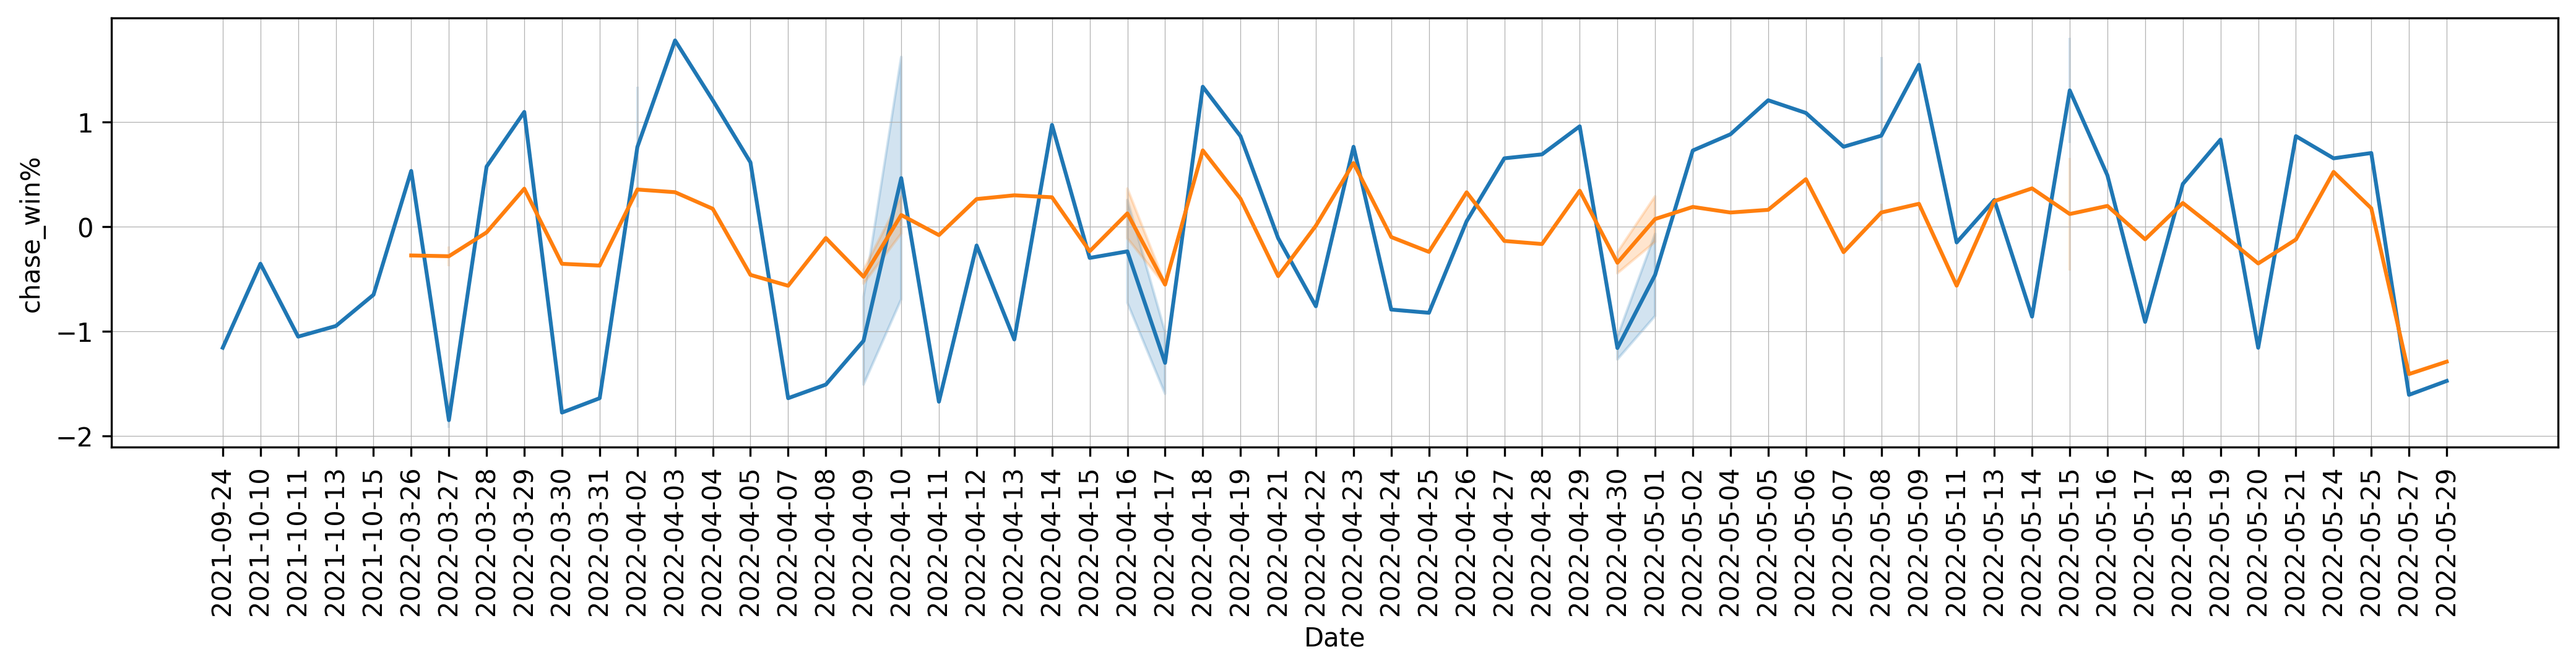

In [75]:
plt.rcParams.update({'figure.figsize': (17,3), 'figure.dpi': 300})
fig, ax = plt.subplots()
sns.lineplot(data=pre.tail(70), x='Date', y='chase_win%')
sns.lineplot(data = test_df, x = 'Date', y = 'predictions')
plt.grid(linestyle = '-',linewidth = 0.3)
ax.tick_params(axis='x', rotation = 90)

In [76]:
from xgboost import XGBRegressor
reg = XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate=0.001)
reg.fit(X_train,
        y_train,
        eval_set = [(X_train, y_train), (X_test,y_test)],
        eval_metric = 'mae',
        verbose = 100)

[0]	validation_0-mae:0.72227	validation_1-mae:0.95204


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-mae:0.69242	validation_1-mae:0.91704
[200]	validation_0-mae:0.66671	validation_1-mae:0.88243
[300]	validation_0-mae:0.64460	validation_1-mae:0.85167
[400]	validation_0-mae:0.62608	validation_1-mae:0.83147
[500]	validation_0-mae:0.61017	validation_1-mae:0.81812
[600]	validation_0-mae:0.59608	validation_1-mae:0.80876
[700]	validation_0-mae:0.58382	validation_1-mae:0.79996
[800]	validation_0-mae:0.57296	validation_1-mae:0.79464
[900]	validation_0-mae:0.56288	validation_1-mae:0.79083
[999]	validation_0-mae:0.55278	validation_1-mae:0.78647


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

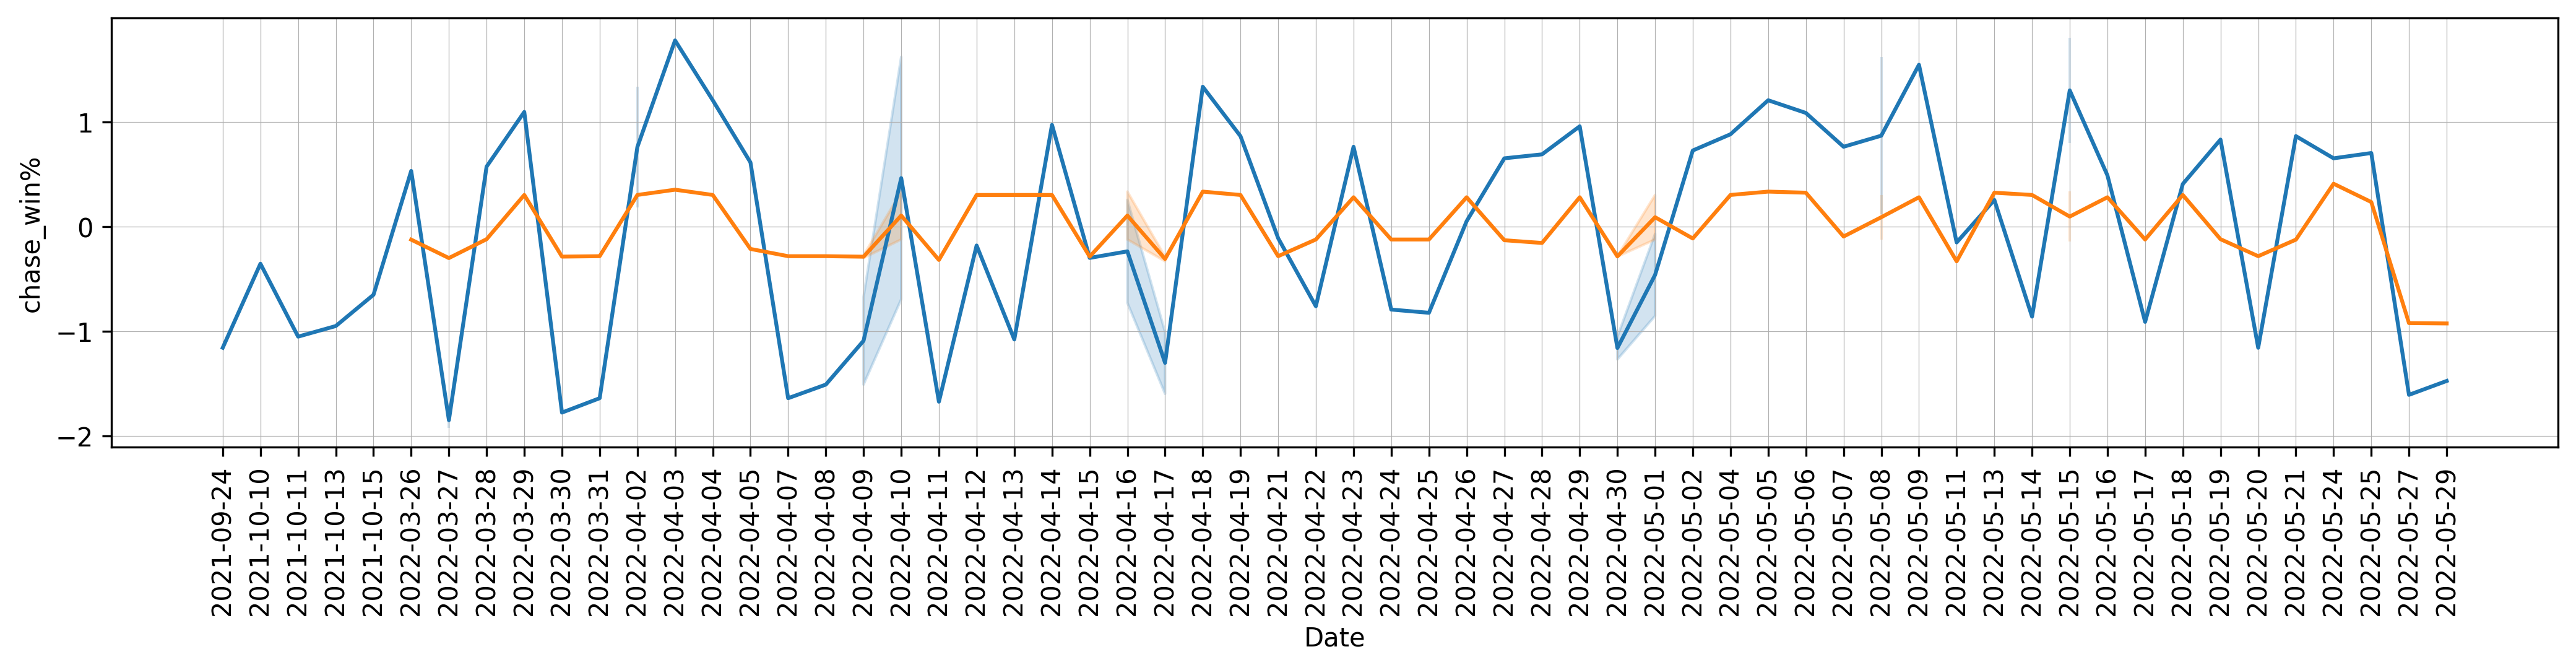

In [77]:
predictions = reg.predict(X_test)

test_df = test_df.reset_index().drop('index', axis = 1)
test_df['predictions'] = pd.Series(predictions)

plt.rcParams.update({'figure.figsize': (17,3), 'figure.dpi': 300})
fig, ax = plt.subplots()
sns.lineplot(data=pre.tail(70), x='Date', y='chase_win%')
sns.lineplot(data = test_df, x = 'Date', y = 'predictions')
plt.grid(linestyle = '-',linewidth = 0.3)
ax.tick_params(axis='x', rotation = 90)

In [78]:
#check correlation
n.corr()

<ipython-input-78-8b0e5dcaf9a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  n.corr()


,ID,0Runs_x,1Runs_x,4Runs_x,2Runs_x,6Runs_x,5Runs_x,3Runs_x,byes_x,legbyes_x,noballs_x,penalty_x,wides_x,isBowlerWk_x,isWicketDelivery_x,batsman_run_x,extras_run_x,total_run_x,runs_not_counting_for_maiden_overs_x,WonByRuns,WonByWickets,chase,target,0Runs_y,1Runs_y,4Runs_y,2Runs_y,6Runs_y,5Runs_y,3Runs_y,byes_y,legbyes_y,noballs_y,penalty_y,wides_y,isBowlerWk_y,isWicketDelivery_y,batsman_run_y,extras_run_y,total_run_y,runs_not_counting_for_maiden_overs_y,Powerplay_Runs_x,Powerplay_Runs_y,Middleover_Runs_x,Middleover_Runs_y,Deathover_Runs_x,Deathover_Runs_y,chase_win%,target_win%,Season_encoded
ID,1.000000,-0.163996,0.150766,-0.042166,-0.048593,0.247972,-0.060569,-0.062584,-0.067427,-0.185279,-0.048986,NaN,0.061001,0.043467,-0.019432,0.181161,-0.116340,0.161056,0.182372,-0.022750,0.006209,0.023256,-0.023256,-0.139018,0.065902,0.047278,-0.000733,0.222961,-0.034472,-0.076288,-0.099659,-0.176922,-0.116002,-0.011147,0.051042,0.019286,-0.014639,0.206190,-0.105003,0.187007,0.204478,-0.154764,-0.181608,0.098095,0.095160,0.121335,0.033985,-0.007703,0.007703,0.987755
0Runs_x,-0.163996,1.000000,-0.639672,-0.343033,-0.307503,-0.204844,0.041051,-0.060607,0.066578,0.176348,0.033759,NaN,0.286511,0.431965,0.465053,-0.619400,0.323290,-0.562355,-0.586636,-0.187908,0.201122,0.169583,-0.169583,0.234170,-0.236219,-0.183050,-0.105181,-0.280856,0.000739,0.058737,0.016321,-0.092716,-0.034170,0.046173,-0.050540,-0.102522,-0.122941,-0.413015,-0.024873,-0.412387,-0.412393,0.238166,0.051180,0.152436,-0.054666,-0.035300,-0.262629,0.004187,-0.004187,-0.144617
1Runs_x,0.150766,-0.639672,1.000000,-0.188743,-0.033895,-0.157470,-0.034780,-0.049016,-0.025291,-0.184867,0.000592,NaN,-0.028854,-0.157593,-0.166302,0.007473,-0.137044,-0.014122,0.005011,-0.121067,0.036030,0.075808,-0.075808,-0.122459,0.137367,0.018188,0.036547,0.057984,-0.013361,-0.046248,-0.036549,-0.006381,-0.059569,0.010643,-0.028707,-0.058806,-0.048757,0.099746,-0.064706,0.088230,0.094104,-0.050523,-0.075936,-0.027832,-0.004731,0.170761,0.065505,-0.058988,0.058988,0.137970
4Runs_x,-0.042166,-0.343033,-0.188743,1.000000,-0.069246,0.129568,-0.034401,0.010788,-0.065446,-0.018309,0.083131,NaN,0.021439,-0.297519,-0.307234,0.655751,0.018762,0.652047,0.651382,0.310440,-0.230418,-0.264005,0.264005,-0.153723,0.087109,0.264053,0.019984,0.270967,0.014887,-0.041265,-0.004916,0.103608,0.046838,-0.035726,0.055954,0.177045,0.178566,0.392333,0.082327,0.401169,0.392841,0.016438,0.026744,0.042631,0.047878,0.096596,0.184911,0.072047,-0.072047,-0.045701
2Runs_x,-0.048593,-0.307503,-0.033895,-0.069246,1.000000,-0.181375,-0.010547,0.122693,-0.006663,-0.000139,-0.058872,NaN,-0.036416,-0.183319,-0.189767,0.083591,-0.062427,0.072941,0.077749,0.048492,-0.093979,-0.097869,0.097869,-0.040902,0.103605,-0.007581,0.200479,-0.079361,0.007967,0.124914,-0.030776,0.037698,0.076269,-0.061339,0.032930,0.042546,0.068665,0.028379,-0.000467,0.027986,0.032984,-0.000355,0.068538,-0.044935,-0.032203,0.016629,0.135438,0.056215,-0.056215,-0.052534
6Runs_x,0.247972,-0.204844,-0.157470,0.129568,-0.181375,1.000000,-0.035626,-0.070381,-0.036699,-0.048767,0.122937,NaN,0.090901,-0.285771,-0.324135,0.743918,0.035006,0.741870,0.745303,0.350846,-0.269773,-0.224394,0.224394,-0.117203,0.092000,0.171908,-0.052130,0.461674,-0.001725,-0.125642,0.030011,0.006261,0.055225,-0.032833,0.157569,0.200891,0.200366,0.451817,0.076171,0.458998,0.460667,-0.036051,-0.033028,0.114495,0.165879,0.187847,0.217370,-0.001510,0.001510,0.240812
5Runs_x,-0.060569,0.041051,-0.034780,-0.034401,-0.010547,-0.035626,1.000000,-0.039890,-0.011714,-0.006444,-0.007559,NaN,-0.011882,0.053109,0.056936,-0.030851,-0.006532,-0.031564,-0.031651,-0.041624,0.056109,0.027012,-0.027012,0.015878,-0.015605,-0.023119,0.008688,0.027464,-0.034026,-0.059430,-0.036154,0.013018,0.032146,-0.006091,0.021204,-0.052897,-0.063384,-0.001907,0.042241,0.004903,0.000884,0.041637,0.020729,-0.052574,0.041443,-0.024752,-0.014004,-0.050069,0.050069,-0.065405
3Runs_x,-0.062584,-0.060607,-0.049016,0.010788,0.122693,-0

# Prophet

In [79]:
!pip3 install pystan==2.19.1.1
!pip3 install fbprophet==0.7.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 49.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61975166 sha256=593a63745a1d5fed603adb89bdf2741f68827fd5cba2b297c4e8348fa0d6dde2
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates 

In [80]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
data = pre[['Date','chase_win%']]
data.columns = ['ds','y']
train_df_prophet = data[data['ds'] < '2022-03-26']
test_df_prophet = data[data['ds'] >= '2022-03-26']

In [ ]:
# 769 to 833
# 2022-03-26 to 2022-05-29
res = []
for idx in range(769, 833):
    train_df_prophet = data[data.index < idx]
    test_df_prophet = data[data.index == idx]
    m = Prophet(weekly_seasonality = False, daily_seasonality = False)
    m.fit(train_df_prophet)
    prophet_predictions = m.predict(test_df_prophet)
    prophet_predictions['ds'] = prophet_predictions['ds'].apply(lambda x:x.strftime('%Y-%m-%d'))
    result = test_df_prophet.merge(prophet_predictions[['ds', 'yhat']], on = 'ds')
    res.append(result)

In [ ]:
test_df_prophet = pd.concat(res)

In [ ]:
plt.rcParams.update({'figure.figsize': (17,3), 'figure.dpi': 300})
fig, ax = plt.subplots()
sns.lineplot(data=pre.tail(70), x='Date', y='chase_win%')
sns.lineplot(data = test_df_prophet, x = 'ds', y = 'yhat')
plt.grid(linestyle = '-',linewidth = 0.3)
ax.tick_params(axis='x', rotation = 90)